## Volatility for Returns of Comparable Assets


Instructions for adding a new comparable asset:
1. Load data in Dataset Import Cell
2. Add Name to tickers and df_names

Instructions for new length of analysis:
1. Change Start to desired start time
2. Watch 'baseline' date index, using BTC since contains every date, some traditional assets, currencies and crytpocurrencies all have differing valid dates.

In [1]:
# Standard Library Imports
#import pandas as pd
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
#from tabulate import tabulate
from scipy import stats
sns.set_style('whitegrid')
import datetime as dt

%matplotlib inline

In [2]:
# import quandl
# quandl.ApiConfig.api_key = 'BzJzsU5Cxxc3BPJteJdu'
# T_bill  = quandl.get('EOD/BIL')

### FOR Generating PDF Functions using statmodels package
#### Can install library: https://www.statsmodels.org/stable/install.html and import with cell below
#### OR call API:  import statsmodels.api as sm and import statsmodels.sandbox.distributions.extras

In [3]:

import statsmodels.sandbox.distributions.extras as stat_model

### Comparison to Other Currencies and Stock Market Indices
#### Dataset Import

In [4]:
# Max available from dataset from Yahoo Finance, varies depending on asset
btc_usd = pd.read_csv('BTC-USDmax.csv')
#usd_eur = pd.read_csv('usd_eur1218')
djia = pd.read_csv('DJIAmax.csv')
S_and_P = pd.read_csv('SandPmax.csv')
MSCI_World = pd.read_csv('URTHmax.csv') # iShares MSCI World ETF (URTH) 
#VTI = pd.read_csv('VTImax.csv') # Vanguard Total Stock Market ETF (VTI)
T_Bill = pd.read_csv('BILmax.csv') # SPDR Blmbg Barclays 1-3 Mth T-Bill ETF
DBV = pd.read_csv('DBVmax.csv') # Invesco DB G10 Currency Harvest
CEW = pd.read_csv('CEWmax.csv') # WisdomTree Emerging Currency Strat ETF
ACWI = pd.read_csv('ACWImax.csv') # iShares MSCI ACWI ETF
AGG = pd.read_csv('AGGmax.csv') # iShares Core US Aggregate Bond ETF

In [5]:
T_Bill.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2932,2019-01-22,91.559998,91.570000,91.550003,91.570000,91.570000,1930700
2933,2019-01-23,91.580002,91.580002,91.570000,91.570000,91.570000,1637700
2934,2019-01-24,91.589996,91.599998,91.589996,91.599998,91.599998,1200800
2935,2019-01-25,91.589996,91.599998,91.589996,91.589996,91.589996,2123700
2936,2019-01-28,91.610001,91.610001,91.599998,91.599998,91.599998,1286100


In [6]:
usd_eur = pd.read_csv('usd_eur_quandl.csv')

In [7]:
usd_eur.head()

,Date,Value
0,1/4/1999,1.1812
1,1/5/1999,1.1760
2,1/6/1999,1.1636
3,1/7/1999,1.1672
4,1/8/1999,1.1554


In [8]:
usd_eur.Date = pd.to_datetime(usd_eur.Date, format = '%m/%d/%Y')
# print(usd_eur.Date)

In [9]:
# Start date, dealt with later
# usd_eur = usd_eur[usd_eur.Date  >= start ]
# usd_eur = usd_eur.reset_index(drop = True)
usd_eur['Close'] = usd_eur.Value
usd_eur = usd_eur.drop(['Value'], axis =1)
usd_eur.head()

,Date,Close
0,1999-01-04,1.1812
1,1999-01-05,1.1760
2,1999-01-06,1.1636
3,1999-01-07,1.1672
4,1999-01-08,1.1554


### ADD EVERY TICKER NAME HERE!

In [10]:
tickers=[ 'btc_usd','djia', 'S_and_P','MSCI_World', 'usd_eur',  'T_Bill', 'DBV', 'CEW', 'ACWI', 'AGG'] # order must match returns columns
df_names = [btc_usd, djia,   S_and_P,  MSCI_World,   usd_eur,    T_Bill,   DBV,   CEW,   ACWI,   AGG]

# Eight Year

### Set START DATE OF ANALYSIS

In [11]:
#First day of ethereum trading

# 8 years 
start = dt.datetime(2011, 1, 21)
#Enter a specific date or today
end = dt.datetime(2019, 1, 20)
#end = dt.date.today()
print(start)

2011-01-21 00:00:00


Make a dataframe starts at Time specified, date as index, and columns the close price of assets in question

In [12]:
df=pd.DataFrame()
# usd_eur = usd_eur[usd_eur.Date  >= start ]
# usd_eur = usd_eur.reset_index(drop = True)

# USING BTC AS BASELINE DATE because it has every day
# NEED TO CHANGE IF BTC IS NOT IN DATASET OR DOING ANYALYSIS PRE-DATING BTC
df['Date'] = btc_usd.Date

df.Date = pd.to_datetime(df.Date, format = '%Y/%m/%d')
df = df[df.Date  >= start ]
df = df.set_index('Date')

for count, name in enumerate(df_names):
    df = df.join(name.set_index('Date').Close.rename(tickers[count]))

In [13]:
df.head(10)

,btc_usd,djia,S_and_P,MSCI_World,usd_eur,T_Bill,DBV,CEW,ACWI,AGG
Date,,,,,,,,,,
2011-01-21,0.4199,11871.839844,1283.349976,NaN,1.3581,91.699997,23.650000,22.340000,47.340000,105.610001
2011-01-22,0.4443,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-23,0.4424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-24,0.4199,11980.519531,1290.839966,NaN,1.3653,91.699997,23.719999,22.440001,47.639999,105.550003
2011-01-25,0.4100,11977.190430,1291.180054,NaN,1.3644,91.720001,23.709999,22.360001,47.619999,105.879997
2011-01-26,0.4170,11985.440430,1296.630005,NaN,1.3688,91.699997,23.830000,22.420000,47.830002,105.529999
2011-01-27,0.4212,11989.830078,1299.540039,NaN,1.3688,91.720001,23.790001,22.400000,47.950001,105.709999
2011-01-28,0.4460,11823.700195,1276.339966,NaN,1.3607,91.699997,23.670000,22.150000,46.830002,105.860001
2011-01-29,0.4390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Daily Percent Change
#### daily_df is a dataframe of daily returns

In [14]:
daily_df=pd.DataFrame(df, copy =True)

for count, name in enumerate(tickers):
    daily_df[name] = df[name].dropna().pct_change(fill_method='ffill')

daily_df.head(10)

,btc_usd,djia,S_and_P,MSCI_World,usd_eur,T_Bill,DBV,CEW,ACWI,AGG
Date,,,,,,,,,,
2011-01-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-22,0.058109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-23,-0.004276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-24,-0.050859,0.009154,0.005836,NaN,0.005302,0.000000,0.002960,0.004476,0.006337,-0.000568
2011-01-25,-0.023577,-0.000278,0.000263,NaN,-0.000659,0.000218,-0.000422,-0.003565,-0.000420,0.003126
2011-01-26,0.017073,0.000689,0.004221,NaN,0.003225,-0.000218,0.005061,0.002683,0.004410,-0.003306
2011-01-27,0.010072,0.000366,0.002244,NaN,0.000000,0.000218,-0.001679,-0.000892,0.002509,0.001706
2011-01-28,0.058879,-0.013856,-0.017853,NaN,-0.005918,-0.000218,-0.005044,-0.011161,-0.023358,0.001419
2011-01-29,-0.015695,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
returns=daily_df

In [16]:
returns.head(10)

,btc_usd,djia,S_and_P,MSCI_World,usd_eur,T_Bill,DBV,CEW,ACWI,AGG
Date,,,,,,,,,,
2011-01-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-22,0.058109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-23,-0.004276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-24,-0.050859,0.009154,0.005836,NaN,0.005302,0.000000,0.002960,0.004476,0.006337,-0.000568
2011-01-25,-0.023577,-0.000278,0.000263,NaN,-0.000659,0.000218,-0.000422,-0.003565,-0.000420,0.003126
2011-01-26,0.017073,0.000689,0.004221,NaN,0.003225,-0.000218,0.005061,0.002683,0.004410,-0.003306
2011-01-27,0.010072,0.000366,0.002244,NaN,0.000000,0.000218,-0.001679,-0.000892,0.002509,0.001706
2011-01-28,0.058879,-0.013856,-0.017853,NaN,-0.005918,-0.000218,-0.005044,-0.011161,-0.023358,0.001419
2011-01-29,-0.015695,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Bollinger Band Comparison

In [17]:
for count, name in enumerate(tickers):
    print(count, name)

0 btc_usd
1 djia
2 S_and_P
3 MSCI_World
4 usd_eur
5 T_Bill
6 DBV
7 CEW
8 ACWI
9 AGG


In [18]:
rolling_std=pd.DataFrame(df, copy =True)
rolling_mean=pd.DataFrame(df, copy =True)

for count, name in enumerate(tickers):
    rolling_std[name] = (df[name].dropna().rolling(window = 21).std()).T.squeeze()
    rolling_mean[name] = (df[name].dropna().rolling(window = 21).mean()).T.squeeze()

rolling_mean.iloc[85:90]

,btc_usd,djia,S_and_P,MSCI_World,usd_eur,T_Bill,DBV,CEW,ACWI,AGG
Date,,,,,,,,,,
2011-04-13,0.790148,12201.361421,1312.135242,NaN,1.421567,91.713332,24.077143,22.839048,48.001905,105.235237
2011-04-14,0.798238,12233.354306,1314.880005,NaN,1.424148,91.711427,24.172381,22.880476,48.158095,105.189523
2011-04-15,0.810190,12260.365746,1317.068580,NaN,1.426157,91.710475,24.281905,22.923810,48.278095,105.165237
2011-04-16,0.824000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-04-17,0.841190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
upper_band = rolling_mean + (rolling_std* 2)
lower_band = rolling_mean - (rolling_std* 2)
middle_band= rolling_mean

### TIME SERIES VISUALIZATION

In [20]:
# for name in df_names:
#     name.Date = pd.to_datetime(name.Date, format = '%Y/%m/%d')
#     name = name.reset_index(drop = True)

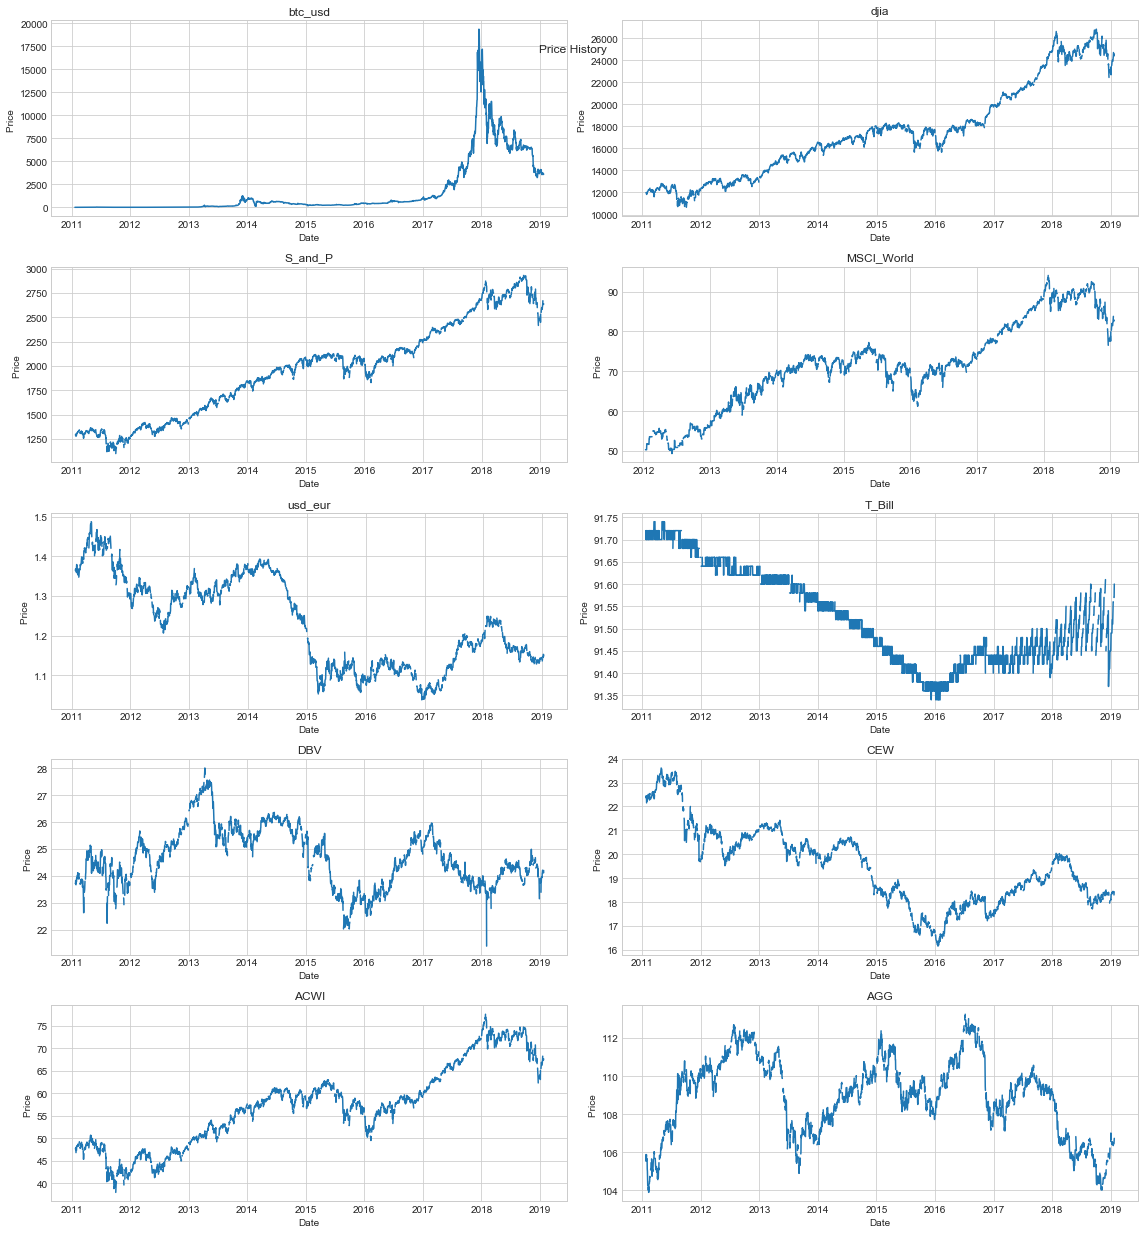

In [21]:
plt.figure(figsize=(16,34))
plt.suptitle('Price History')
for count, name in enumerate(tickers):
    plt.subplot(len(tickers),2,count+1)
    plt.plot(df.index, df[name]) #,legend=True,logy=True )
    plt.title(tickers[count])
    plt.xlabel('Date')
    plt.ylabel('Price ')

plt.tight_layout()

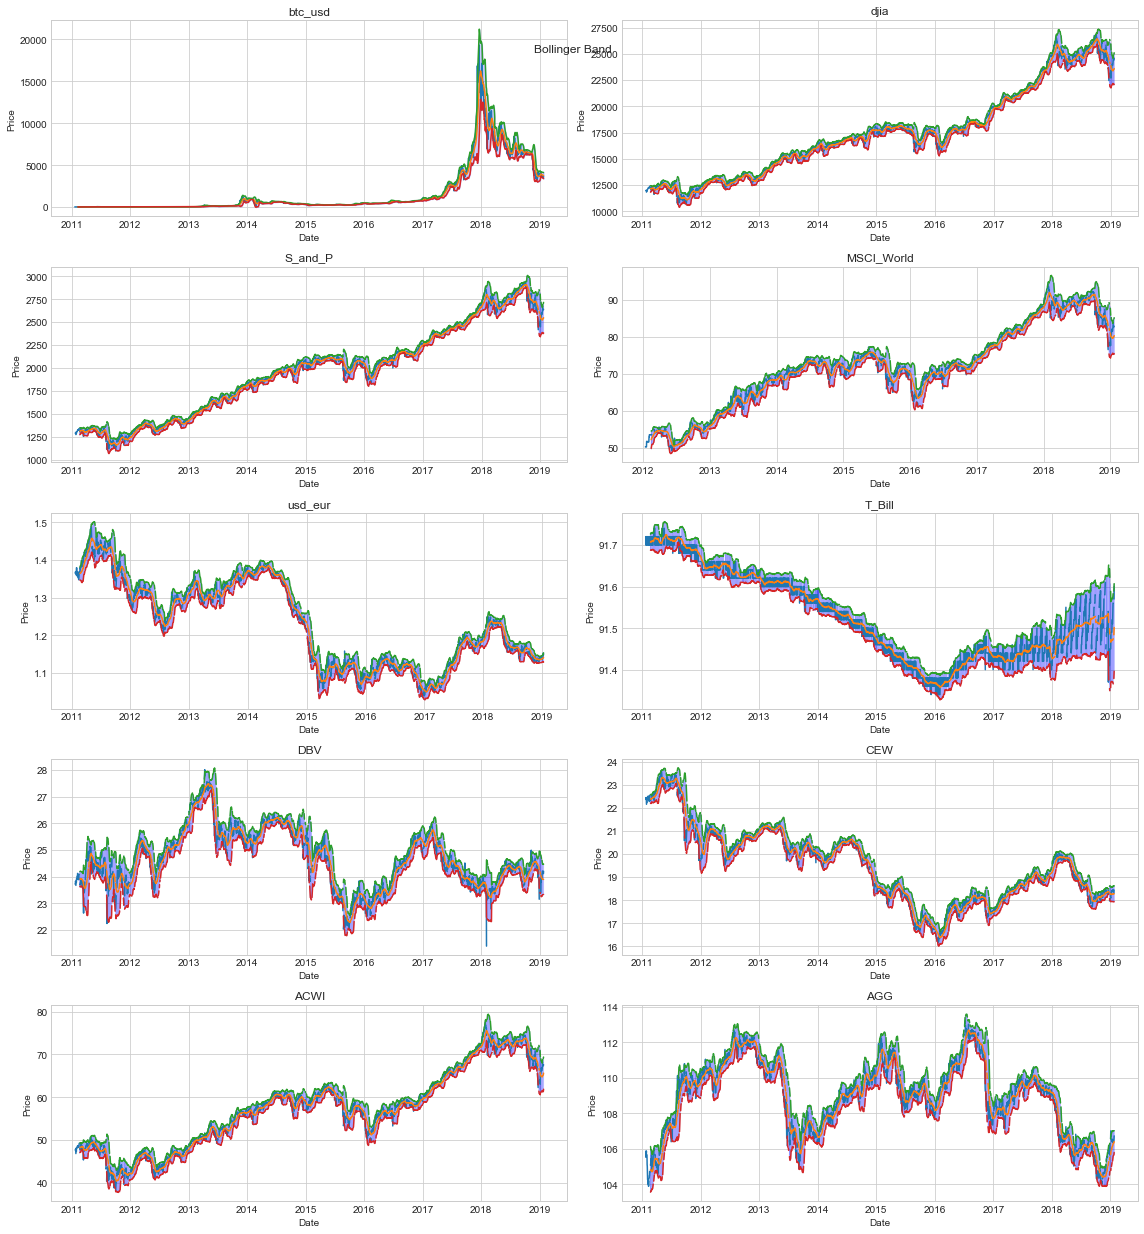

In [22]:
plt.figure(figsize=(16,34))
for count, name in enumerate(df_names):
    plt.subplot(len(tickers),2,count+1)
    plt.plot(df.index, df[tickers[count]])
    plt.plot(middle_band.index, middle_band[tickers[count]]) # name.Close)
    plt.plot(upper_band.index, upper_band[tickers[count]]) # name.Close)
    plt.plot(lower_band.index, lower_band[tickers[count]]) # name.Close)
    plt.fill_between(rolling_std.index, lower_band[tickers[count]], upper_band[tickers[count]], color='b', alpha=0.2)
    plt.title(tickers[count])
    plt.xlabel('Date')
    plt.ylabel('Price')
plt.suptitle('Bollinger Band')
plt.tight_layout()

### Correlation

In [23]:
corr_df=returns.corr()
corr_df

,btc_usd,djia,S_and_P,MSCI_World,usd_eur,T_Bill,DBV,CEW,ACWI,AGG
btc_usd,1.000000,0.010716,0.006875,0.012284,-0.010891,0.006784,-0.014974,-0.014415,0.008901,0.020329
djia,0.010716,1.000000,0.971579,0.686027,0.126728,-0.028896,0.409082,0.470665,0.927806,-0.263684
S_and_P,0.006875,0.971579,1.000000,0.705875,0.135694,-0.026681,0.427706,0.487010,0.956891,-0.255379
MSCI_World,0.012284,0.686027,0.705875,1.000000,0.041096,-0.015201,0.253182,0.365139,0.731767,-0.105483
usd_eur,-0.010891,0.126728,0.135694,0.041096,1.000000,-0.000855,0.003326,0.434869,0.237915,0.011076
T_Bill,0.006784,-0.028896,-0.026681,-0.015201,-0.000855,1.000000,-0.044836,-0.009469,-0.019480,0.102664
DBV,-0.014974,0.409082,0.427706,0.253182,0.003326,-0.044836,1.000000,0.360468,0.449402,-0.136479
CEW,-0.014415,0.470665,0.487010,0.365139,0.434869,-0.009469,0.360468,1.000000,0.586031,-0.001843
ACWI,0.008901,0.927806,0.956891,0.731767,0.237915,-0.019480,0.449402,0.586031,1.000000,-0.235434
AGG,0.020329,-0.263684,-0.255379,-0.105483,0.011076,0.102664,-0.136479,-0.001843,-0.235434,1.000000


### Statistics Table

In [24]:
# returns = returns[0:1246]
# returns.tail()

In [25]:
stat_table=pd.DataFrame(index=tickers)
# stat_table.set_index(tickers)
stat_table['Mean']=stats.describe(returns.dropna())[2]
stat_table['Min']=stats.describe(returns.dropna())[1][0]
stat_table['Max']=stats.describe(returns.dropna())[1][1]
stat_table['Variance']=stats.describe(returns.dropna())[3]
stat_table['Std']=returns.dropna().std()
stat_table['Skewness']=stats.describe(returns.dropna())[4]
stat_table['Kurtosis']=stats.describe(returns.dropna())[5]
stat_table['z-value']=stats.kurtosistest(returns.dropna())[0]
stat_table['p-value']=stats.kurtosistest(returns.dropna())[1]
stat_table

,Mean,Min,Max,Variance,Std,Skewness,Kurtosis,z-value,p-value
btc_usd,4.904421e-03,-0.572057,3.368390,9.302161e-03,0.096448,24.255152,848.658232,30.802861,2.399185e-208
djia,4.369790e-04,-0.046049,0.049846,6.425896e-05,0.008016,-0.319593,3.545297,12.217886,2.494878e-34
S_and_P,4.649206e-04,-0.040979,0.049594,6.647815e-05,0.008153,-0.314770,3.285166,11.802157,3.804307e-32
MSCI_World,3.534342e-04,-0.055835,0.054237,9.044030e-05,0.009510,-0.166108,4.299553,13.273686,3.289898e-40
usd_eur,-5.730449e-05,-0.026370,0.031117,2.806044e-05,0.005297,0.092899,2.052616,9.300721,1.394971e-20
T_Bill,-8.563741e-07,-0.001857,0.000438,4.172970e-08,0.000204,-2.411319,15.848951,19.965281,1.104050e-88
DBV,5.708581e-06,-0.078017,0.080879,3.566818e-05,0.005972,-0.298626,38.333070,23.588398,5.070123e-123
CEW,-2.280015e-05,-0.021847,0.020387,2.228976e-05,0.004721,-0.142323,1.126262,6.446640,1.143566e-10
ACWI,3.086872e-04,-0.053842,0.036940,7.180353e-05,0.008474,-0.449399,2.767692,10.874498,1.524930e-27
AGG,-1.856343e-05,-0.010934,0.008395,3.992259e-06,0.001998,-0.393940,1.427454,7.512440,5.803536e-14


In [26]:
stat_table['Mean']['MSCI_World']

0.00035343417365138886

In [27]:
returns.dropna().describe()

,btc_usd,djia,S_and_P,MSCI_World,usd_eur,T_Bill,DBV,CEW,ACWI,AGG
count,1743.000000,1743.000000,1743.000000,1743.000000,1743.000000,1.743000e+03,1743.000000,1743.000000,1743.000000,1743.000000
mean,0.004904,0.000437,0.000465,0.000353,-0.000057,-8.563741e-07,0.000006,-0.000023,0.000309,-0.000019
std,0.096448,0.008016,0.008153,0.009510,0.005297,2.042785e-04,0.005972,0.004721,0.008474,0.001998
min,-0.572057,-0.046049,-0.040979,-0.055835,-0.026370,-1.857090e-03,-0.078017,-0.021847,-0.053842,-0.010934
25%,-0.011747,-0.003034,-0.003092,-0.003356,-0.003044,0.000000e+00,-0.002820,-0.002875,-0.003725,-0.001135
50%,0.002259,0.000530,0.000482,0.000000,-0.000073,0.000000e+00,0.000383,0.000000,0.000657,0.000092
75%,0.020570,0.004601,0.004753,0.004257,0.002925,1.093593e-04,0.003127,0.002944,0.005012,0.001254
max,3.368390,0.049846,0.049594,0.054237,0.031117,4.376368e-04,0.080879,0.020387,0.036940,0.008395


### Covariance

In [28]:
cov_df=returns[1:].dropna().cov()
cov_df

,btc_usd,djia,S_and_P,MSCI_World,usd_eur,T_Bill,DBV,CEW,ACWI,AGG
btc_usd,9.302161e-03,4.392193e-06,1.640042e-06,1.183985e-05,-1.397114e-05,2.057024e-07,-1.926685e-05,-1.343509e-05,-4.748962e-07,3.086426e-06
djia,4.392193e-06,6.425896e-05,6.318296e-05,5.215284e-05,6.168393e-07,-4.310874e-08,1.501966e-05,1.537435e-05,6.211220e-05,-3.317849e-06
S_and_P,1.640042e-06,6.318296e-05,6.647815e-05,5.458319e-05,9.499572e-07,-4.317556e-08,1.607174e-05,1.631468e-05,6.550549e-05,-3.185527e-06
MSCI_World,1.183985e-05,5.215284e-05,5.458319e-05,9.044030e-05,2.070260e-06,-3.208363e-08,1.449799e-05,1.634236e-05,5.885275e-05,-1.992955e-06
usd_eur,-1.397114e-05,6.168393e-07,9.499572e-07,2.070260e-06,2.806044e-05,5.438230e-09,-3.480188e-06,9.759779e-06,5.731948e-06,8.637699e-07
T_Bill,2.057024e-07,-4.310874e-08,-4.317556e-08,-3.208363e-08,5.438230e-09,4.172970e-08,-4.792770e-08,-2.425940e-09,-2.258664e-08,4.212259e-08
DBV,-1.926685e-05,1.501966e-05,1.607174e-05,1.449799e-05,-3.480188e-06,-4.792770e-08,3.566818e-05,8.136247e-06,1.761924e-05,-7.054440e-07
CEW,-1.343509e-05,1.537435e-05,1.631468e-05,1.634236e-05,9.759779e-06,-2.425940e-09,8.136247e-06,2.228976e-05,2.162319e-05,7.432364e-07
ACWI,-4.748962e-07,6.211220e-05,6.550549e-05,5.885275e-05,5.731948e-06,-2.258664e-08,1.761924e-05,2.162319e-05,7.180353e-05,-2.853323e-06
AGG,3.086426e-06,-3.317849e-06,-3.185527e-06,-1.992955e-06,8.637699e-07,4.212259e-08,-7.054440e-07,7.432364e-07,-2.853323e-06,3.992259e-06


### Exogenous Distribution of Returns

In [29]:
 # MSCI Test
MSCI_moments = [stat_table['Mean']['MSCI_World'],stat_table['Variance']['MSCI_World'], \
                stat_table['Skewness']['MSCI_World'], stat_table['Kurtosis']['MSCI_World']]

In [30]:
MSCI_function = stat_model.pdf_mvsk(MSCI_moments)

In [31]:
MSCI_function(0)

64.25927218582358

In [32]:
# Create Dataset of 'continuous-like' data , many closely spaced, datapoints, to query generated PDF Function
cont_data = np.arange(-0.05,0.05, 0.0001)
len(cont_data)

1000

In [33]:
# Generate the array containing the output of PDF(x)
temp2 = MSCI_function(cont_data)

In [34]:
# plt.plot(cont_data, temp2)

In [35]:
# plt.hist(returns.MSCI_World.dropna(),bins =15, )

Text(0.5,1,'Actual MSCI Returns')

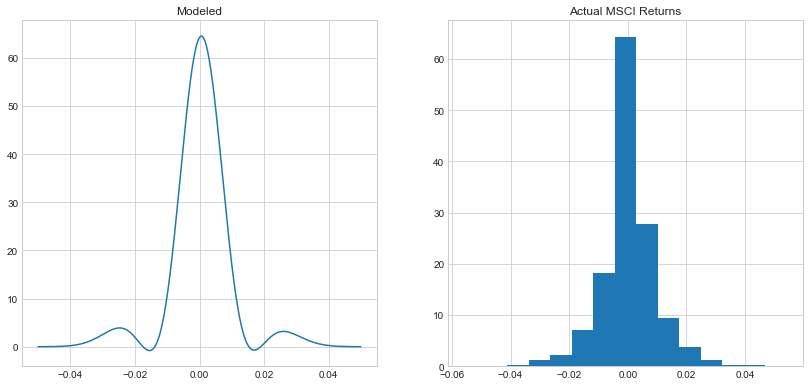

In [36]:
plt.figure(figsize=(14,14))
plt.subplot(2,2,1)
plt.plot(cont_data, temp2)
plt.title('Modeled')

plt.subplot(2,2,2)
plt.hist(returns.MSCI_World.dropna(),bins =15, density =True)
plt.title('Actual MSCI Returns')

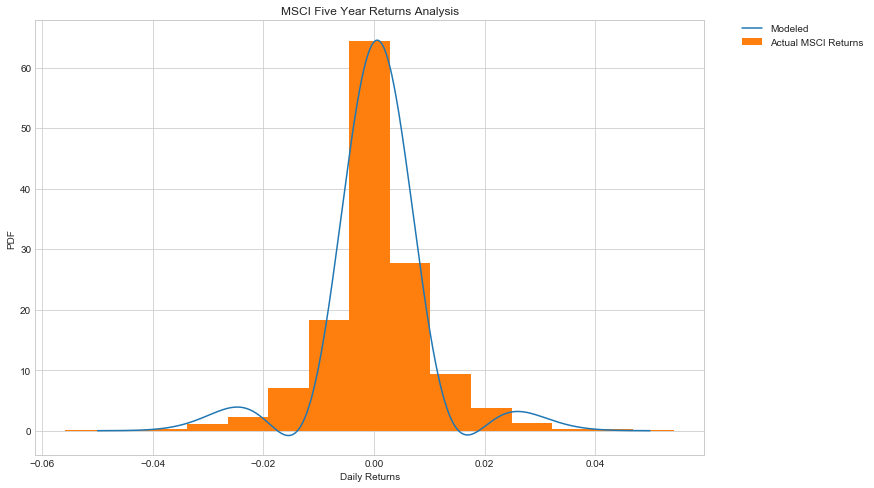

In [37]:
plt.figure(figsize=(12,8))
#plt.subplot(2,2,1)
plt.plot(cont_data, temp2, label = 'Modeled')
#plt.title('Modeled')

#plt.subplot(2,2,2)
plt.hist(returns.MSCI_World.dropna(),bins =15, density =True, label = 'Actual MSCI Returns')
plt.title('MSCI Five Year Returns Analysis')
plt.xlabel('Daily Returns')
plt.ylabel('PDF')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#### PDF FUNCTION FOR ALL TICKS

In [38]:

mvsk_moments = pd.DataFrame()
pdf_function = pd.DataFrame()
pdf_data = pd.DataFrame()
for tick in tickers:
    # Create dataframe of moments for each tick
    mvsk_moments[tick] = [stat_table['Mean'][tick],stat_table['Variance'][tick], \
                stat_table['Skewness'][tick], stat_table['Kurtosis'][tick]]
    # Generate PDF function for each tick
    temp = stat_model.pdf_mvsk(mvsk_moments[tick]) 
    # Dataframe of PDF fucntion at each tick run with data points to create curve
    pdf_function[tick] = temp(cont_data)

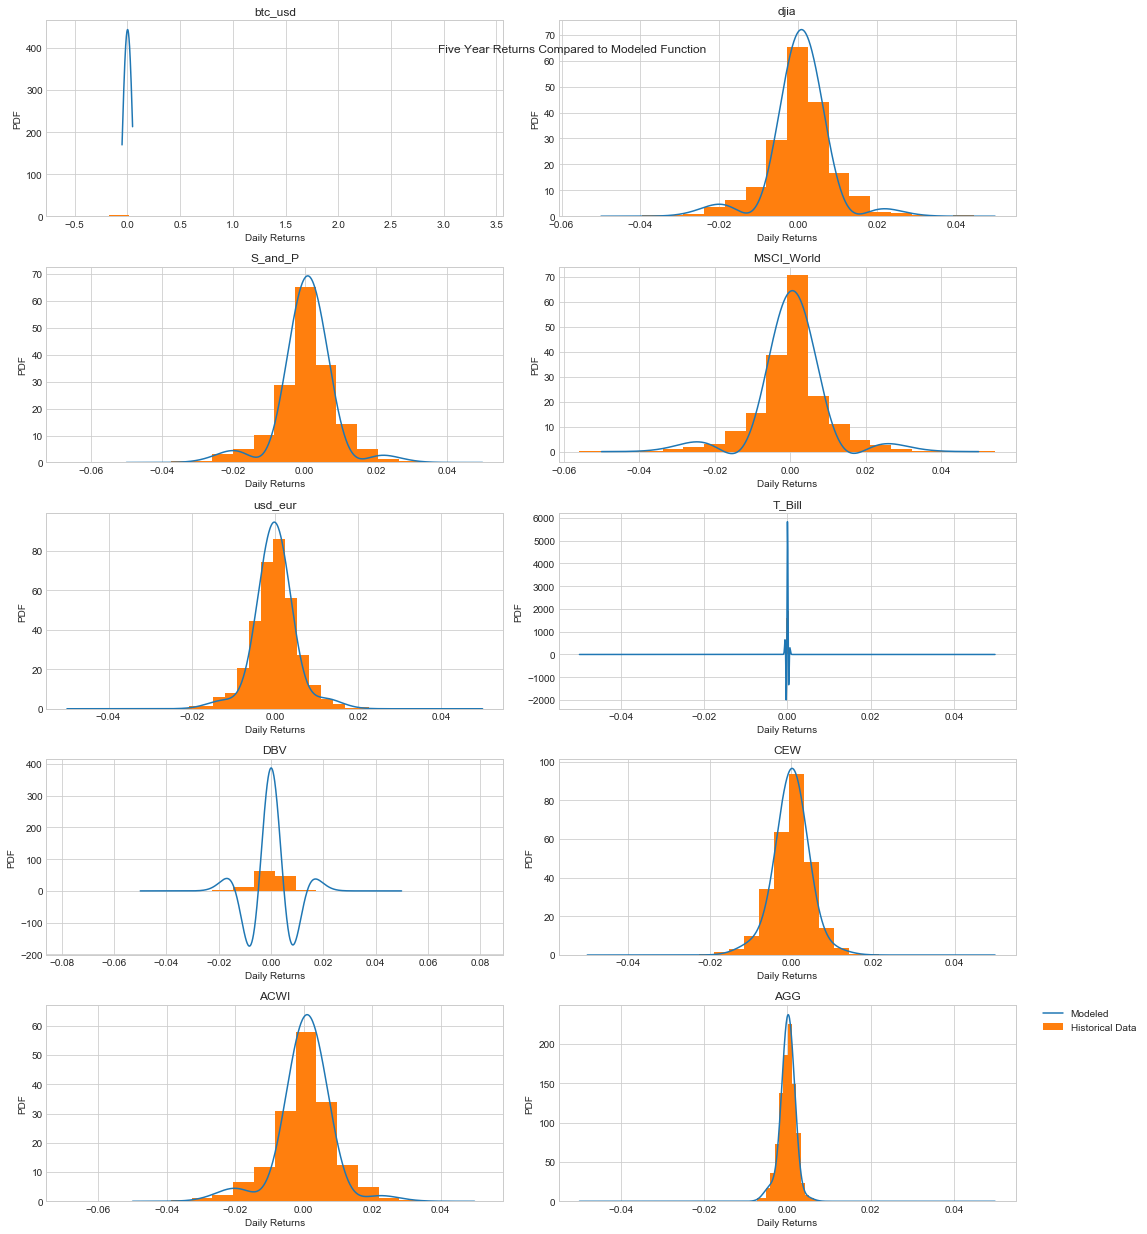

In [39]:
plt.figure(figsize=(16,34))
for count, tick in enumerate(tickers):
    plt.subplot(len(tickers),2,count+1)
    plt.plot(cont_data, pdf_function[tick], label = 'Modeled')
    plt.hist(returns[tick].dropna(),bins =20, density =True, label = 'Historical Data')
    plt.title(tick)
    plt.xlabel('Daily Returns')
    plt.ylabel('PDF')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.suptitle('Five Year Returns Compared to Modeled Function')
plt.tight_layout()

#### CHECK OF PDF FUNCTION

In [40]:
# Check Expected Return = Mean
# Integral of x*f(x)
sum_of_prod = 0
sum_of_x_prod = 0
for tick in tickers:
    for x in range(len(cont_data)):
        # f(x) * dx
        prod = pdf_function[tick][x] *  0.0001
        # x * f(x) * dx
        x_prod = cont_data[x] * prod
         #   Integral of f(x) * dx
        sum_of_prod += prod
         #   Integral of x * f(x) * dx
        sum_of_x_prod += x_prod
    print(tick, ': Integral of PDF = 1 = ',"%.4f" % sum_of_prod,', Modeled mean =',"%.6f" % sum_of_x_prod, \
          ', Calc mean = ', "%.6f" % stat_table['Mean'][tick])
    sum_of_prod = 0
    sum_of_x_prod = 0

btc_usd : Integral of PDF = 1 =  35.3168 , Modeled mean = 0.041070 , Calc mean =  0.004904
djia : Integral of PDF = 1 =  1.0000 , Modeled mean = 0.000437 , Calc mean =  0.000437
S_and_P : Integral of PDF = 1 =  1.0000 , Modeled mean = 0.000465 , Calc mean =  0.000465
MSCI_World : Integral of PDF = 1 =  1.0000 , Modeled mean = 0.000353 , Calc mean =  0.000353
usd_eur : Integral of PDF = 1 =  1.0000 , Modeled mean = -0.000057 , Calc mean =  -0.000057
T_Bill : Integral of PDF = 1 =  1.0000 , Modeled mean = -0.000001 , Calc mean =  -0.000001
DBV : Integral of PDF = 1 =  1.0000 , Modeled mean = 0.000006 , Calc mean =  0.000006
CEW : Integral of PDF = 1 =  1.0000 , Modeled mean = -0.000023 , Calc mean =  -0.000023
ACWI : Integral of PDF = 1 =  1.0000 , Modeled mean = 0.000309 , Calc mean =  0.000309
AGG : Integral of PDF = 1 =  1.0000 , Modeled mean = -0.000019 , Calc mean =  -0.000019


### Investigate any Curve Fitting Here with Alternate Datapoints

In [41]:
# For BTC expanding range of returns to capture full view of curve
temp_cont_data = np.arange(-2,2, 0.0001)
temp_btc_pdf = stat_model.pdf_mvsk(mvsk_moments['btc_usd']) 
temp_pdf_function = temp_btc_pdf(temp_cont_data)

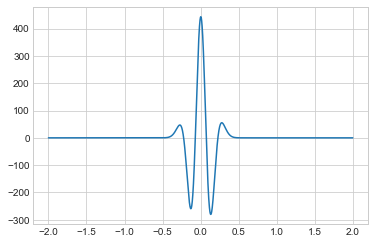

In [42]:
#temp_pdf_function
plt.plot(temp_cont_data, temp_pdf_function, label = 'Modeled')

In [43]:
temp_sum_of_prod = 0
temp_sum_of_x_prod = 0
for x in range(len(temp_cont_data)):
    # f(x) * dx
    prod = temp_pdf_function[x] *  0.0001
    # x * f(x) * dx
    x_prod = temp_cont_data[x] * prod
 #   prod = cont_data[x] * pdf_function['MSCI_World'][x] *  0.0001
    temp_sum_of_prod += prod
    temp_sum_of_x_prod += x_prod
    

In [44]:
print('btc_usd', ': Integral of PDF = 1 = ',"%.4f" % temp_sum_of_prod,', Modeled mean =',"%.6f" % temp_sum_of_x_prod, \
          ', Calc mean = ', "%.6f" % stat_table['Mean']['btc_usd'])

btc_usd : Integral of PDF = 1 =  1.0000 , Modeled mean = 0.004904 , Calc mean =  0.004904


In [45]:
print(temp_sum_of_prod, temp_sum_of_x_prod)

1.0000000000001221 0.004904420853678514


Text(0,0.5,'PDF')

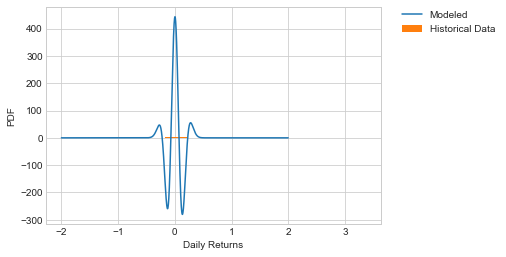

In [46]:
plt.plot(temp_cont_data, temp_pdf_function, label = 'Modeled')
plt.hist(returns['btc_usd'].dropna(),bins =20, density =True, label = 'Historical Data')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Daily Returns')
plt.ylabel('PDF')

#### Annualized Return Analysis

In [47]:
def calc_compound_return(v0,vf,nYears):
    '''
    v0 : Initial value of the investment.
    vf : Final value of the investment.
    nYears : Duration of the investment.
    '''
    growth = float(vf)/v0
    compound_return   = growth**(1./nYears) - 1
    compound_return = compound_return * 100
    return compound_return

def calc_simple_return(v0,vf,nYears):
    '''
    v0 : Initial value of the investment.
    vf : Final value of the investment.
    nYears : Duration of the investment.
    '''
    delta = float(vf) - v0
    simple_return   = delta / v0 /nYears
    simple_return = simple_return *100
    return simple_return

In [48]:
# Get the number of days/years
days = (df.index[0] - df.index[-1]).days
years = days/365

#calculate compound_return
comp_return = [calc_compound_return(df.dropna().loc[:,tick][-1], df.dropna().loc[:,tick][0], years) for tick in tickers]

#calculate simple_return
simp_return = [calc_simple_return(df.dropna().loc[:,tick][-1], df.dropna().loc[:,tick][0], years) for tick in tickers]

#### Value Based, Final - Initial Return, Total Sample

In [49]:
for count, tick in enumerate(tickers):
    print(tick, ' Compounded Return = ', "%.2f" % comp_return[count], \
          '%,  Simple Return = ', "%.2f" % simp_return[count],'%')

btc_usd  Compounded Return =  119.24 %,  Simple Return =  12.46 %
djia  Compounded Return =  8.51 %,  Simple Return =  5.99 %
S_and_P  Compounded Return =  9.06 %,  Simple Return =  6.25 %
MSCI_World  Compounded Return =  6.25 %,  Simple Return =  4.80 %
usd_eur  Compounded Return =  -1.37 %,  Simple Return =  -1.46 %
T_Bill  Compounded Return =  -0.02 %,  Simple Return =  -0.02 %
DBV  Compounded Return =  -0.06 %,  Simple Return =  -0.06 %
CEW  Compounded Return =  -1.11 %,  Simple Return =  -1.17 %
ACWI  Compounded Return =  5.56 %,  Simple Return =  4.39 %
AGG  Compounded Return =  -0.43 %,  Simple Return =  -0.44 %


In [50]:
# Dataframe with no NAs and 1 added to it
returns.ffill(inplace=True)
compound = returns[1:].apply(lambda x: x+1)

In [51]:
compound.head()

,btc_usd,djia,S_and_P,MSCI_World,usd_eur,T_Bill,DBV,CEW,ACWI,AGG
Date,,,,,,,,,,
2011-01-22,1.058109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-23,0.995724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-24,0.949141,1.009154,1.005836,NaN,1.005302,1.000000,1.002960,1.004476,1.006337,0.999432
2011-01-25,0.976423,0.999722,1.000263,NaN,0.999341,1.000218,0.999578,0.996435,0.999580,1.003126
2011-01-26,1.017073,1.000689,1.004221,NaN,1.003225,0.999782,1.005061,1.002683,1.004410,0.996694


#### Compound Annual Return From Daily Returns

In [52]:
compound_from_daily = (compound.prod() **(365/len(compound)) - 1) * 100 

In [53]:
compound_from_daily

btc_usd       207.765473
djia           13.193792
S_and_P        13.532696
MSCI_World      5.166164
usd_eur        -4.987250
T_Bill          0.186028
DBV            -1.156261
CEW             0.050383
ACWI            5.793232
AGG             2.030580
dtype: float64

#### Simple Annual Return from Daily Returns

In [54]:
simple_from_daily = returns[1:].sum() * 365 / len(returns[1:]) * 100
simple_from_daily

btc_usd       201.802081
djia           13.798160
S_and_P        14.207952
MSCI_World      6.441583
usd_eur        -4.542749
T_Bill          0.186562
DBV            -0.434940
CEW             0.505074
ACWI            7.344906
AGG             2.087983
dtype: float64

# Five Year

### Set START DATE OF ANALYSIS

In [55]:
#First day of ethereum trading

# 5 years 
start = dt.datetime(2014, 1, 21)
#Enter a specific date or today
end = dt.datetime(2019, 1, 20)
#end = dt.date.today()
print(start)

2014-01-21 00:00:00


Make a dataframe starts at Time specified, date as index, and columns the close price of assets in question

In [56]:
df=pd.DataFrame()

# USING BTC AS BASELINE DATE because it has every day
# NEED TO CHANGE IF BTC IS NOT IN DATASET OR DOING ANYALYSIS PRE-DATING BTC

df['Date'] = btc_usd.Date

df.Date = pd.to_datetime(df.Date, format = '%Y/%m/%d')
df = df[df.Date  >= start ]
df = df.set_index('Date')

for count, name in enumerate(df_names):
    df = df.join(name.set_index('Date').Close.rename(tickers[count]))

In [57]:
df.head(10)

,btc_usd,djia,S_and_P,MSCI_World,usd_eur,T_Bill,DBV,CEW,ACWI,AGG
Date,,,,,,,,,,
2014-01-21,962.210022,16414.439453,1843.800049,70.150002,1.3560,91.559998,25.500000,19.660000,57.279999,107.300003
2014-01-22,950.950012,16373.339844,1844.859985,70.209999,1.3546,91.559998,25.570000,19.680000,57.360001,107.070000
2014-01-23,944.159973,16197.349609,1828.459961,69.260002,1.3680,91.559998,25.270000,19.580000,56.849998,107.349998
2014-01-24,916.549988,15879.110352,1790.290039,68.110001,1.3680,91.540001,24.990000,19.510000,55.500000,107.580002
2014-01-25,961.049988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-26,1007.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-27,943.539978,15837.879883,1781.560059,67.709999,1.3679,91.540001,25.080000,19.480000,55.209999,107.349998
2014-01-28,932.679993,15928.559570,1792.500000,68.290001,1.3662,91.540001,25.180000,19.549999,55.619999,107.529999
2014-01-29,925.669983,15738.790039,1774.199951,67.529999,1.3663,91.559998,24.950001,19.469999,55.029999,107.849998


### Daily Percent Change
#### daily_df is a dataframe of daily returns

In [58]:
daily_df=pd.DataFrame(df, copy =True)

for count, name in enumerate(tickers):
    daily_df[name] = df[name].dropna().pct_change(fill_method='ffill')

daily_df.head(10)

,btc_usd,djia,S_and_P,MSCI_World,usd_eur,T_Bill,DBV,CEW,ACWI,AGG
Date,,,,,,,,,,
2014-01-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-22,-0.011702,-0.002504,0.000575,0.000855,-0.001032,0.000000,0.002745,0.001017,0.001397,-0.002144
2014-01-23,-0.007140,-0.010749,-0.008890,-0.013531,0.009892,0.000000,-0.011732,-0.005081,-0.008891,0.002615
2014-01-24,-0.029243,-0.019648,-0.020875,-0.016604,0.000000,-0.000218,-0.011080,-0.003575,-0.023747,0.002143
2014-01-25,0.048552,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-26,0.047812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-27,-0.063019,-0.002597,-0.004876,-0.005873,-0.000073,0.000000,0.003601,-0.001538,-0.005225,-0.002138
2014-01-28,-0.011510,0.005725,0.006141,0.008566,-0.001243,0.000000,0.003987,0.003593,0.007426,0.001677
2014-01-29,-0.007516,-0.011914,-0.010209,-0.011129,0.000073,0.000218,-0.009134,-0.004092,-0.010608,0.002976


In [59]:
returns=daily_df

In [60]:
returns.head(10)

,btc_usd,djia,S_and_P,MSCI_World,usd_eur,T_Bill,DBV,CEW,ACWI,AGG
Date,,,,,,,,,,
2014-01-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-22,-0.011702,-0.002504,0.000575,0.000855,-0.001032,0.000000,0.002745,0.001017,0.001397,-0.002144
2014-01-23,-0.007140,-0.010749,-0.008890,-0.013531,0.009892,0.000000,-0.011732,-0.005081,-0.008891,0.002615
2014-01-24,-0.029243,-0.019648,-0.020875,-0.016604,0.000000,-0.000218,-0.011080,-0.003575,-0.023747,0.002143
2014-01-25,0.048552,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-26,0.047812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-27,-0.063019,-0.002597,-0.004876,-0.005873,-0.000073,0.000000,0.003601,-0.001538,-0.005225,-0.002138
2014-01-28,-0.011510,0.005725,0.006141,0.008566,-0.001243,0.000000,0.003987,0.003593,0.007426,0.001677
2014-01-29,-0.007516,-0.011914,-0.010209,-0.011129,0.000073,0.000218,-0.009134,-0.004092,-0.010608,0.002976


### Bollinger Band Comparison

In [61]:
for count, name in enumerate(tickers):
    print(count, name)

0 btc_usd
1 djia
2 S_and_P
3 MSCI_World
4 usd_eur
5 T_Bill
6 DBV
7 CEW
8 ACWI
9 AGG


In [62]:
rolling_std=pd.DataFrame(df, copy =True)
rolling_mean=pd.DataFrame(df, copy =True)

for count, name in enumerate(tickers):
    rolling_std[name] = (df[name].dropna().rolling(window = 21).std()).T.squeeze()
    rolling_mean[name] = (df[name].dropna().rolling(window = 21).mean()).T.squeeze()

rolling_mean.iloc[85:90]

,btc_usd,djia,S_and_P,MSCI_World,usd_eur,T_Bill,DBV,CEW,ACWI,AGG
Date,,,,,,,,,,
2014-04-13,449.229526,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-04-14,452.371429,16323.722889,1860.182856,70.315714,1.380476,91.544762,25.920000,20.099524,57.645238,107.861905
2014-04-15,454.959050,16324.453358,1859.428095,70.316190,1.379900,91.544762,25.940476,20.114286,57.658572,107.890953
2014-04-16,456.144289,16328.675223,1858.954764,70.358095,1.379457,91.544762,25.962857,20.135238,57.687143,107.916667
2014-04-17,457.982383,16337.549944,1859.149048,70.382381,1.379086,91.544762,25.981904,20.157143,57.750000,107.948572


In [63]:
upper_band = rolling_mean + (rolling_std* 2)
lower_band = rolling_mean - (rolling_std* 2)
middle_band= rolling_mean

### TIME SERIES VISUALIZATION

In [64]:
# for name in df_names:
#     name.Date = pd.to_datetime(name.Date, format = '%Y/%m/%d')
#     name = name.reset_index(drop = True)

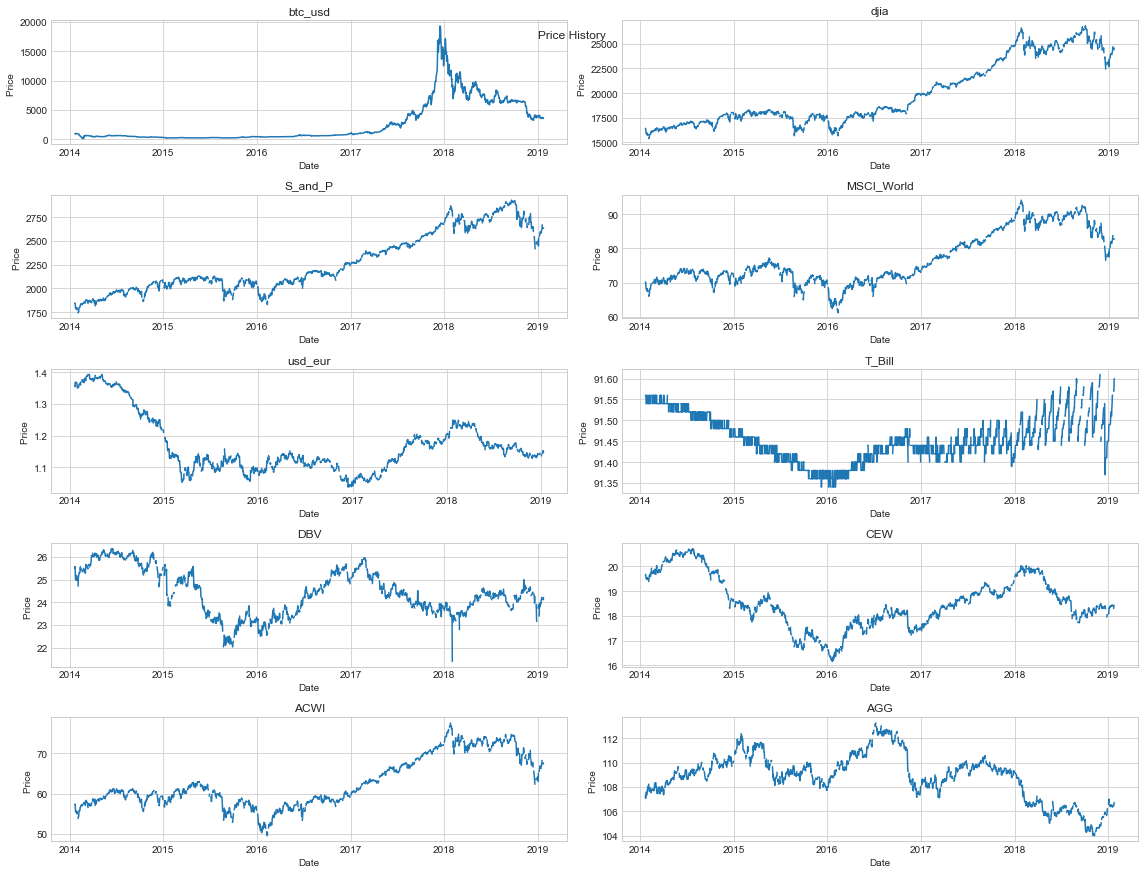

In [65]:
plt.figure(figsize=(16,24))
for count, name in enumerate(tickers):
    plt.subplot(len(tickers),2,count+1)
    plt.plot(df.index, df[name]) #,legend=True,logy=True )
    plt.title(tickers[count])
    plt.xlabel('Date')
    plt.ylabel('Price ')
plt.suptitle('Price History')
plt.tight_layout()

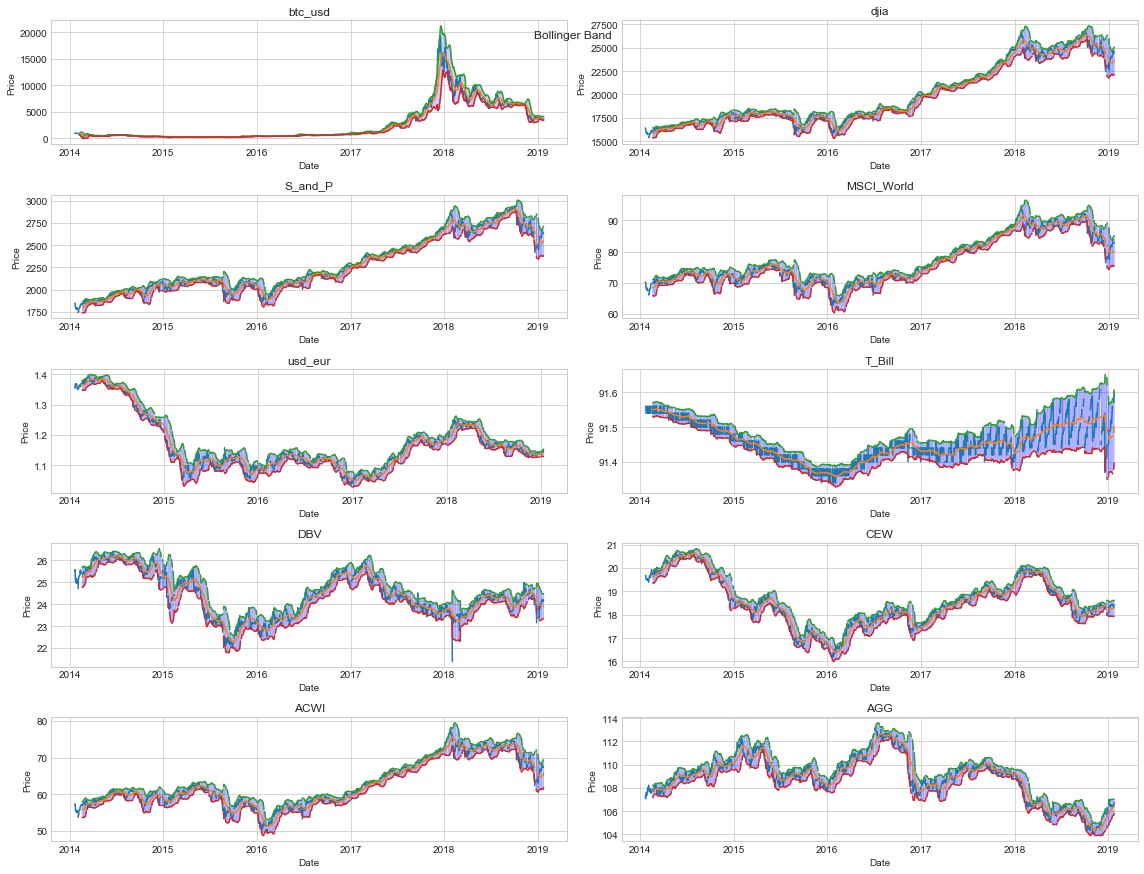

In [66]:
plt.figure(figsize=(16,24))
for count, name in enumerate(df_names):
    plt.subplot(len(tickers),2,count+1)
    plt.plot(df.index, df[tickers[count]])
    plt.plot(middle_band.index, middle_band[tickers[count]]) # name.Close)
    plt.plot(upper_band.index, upper_band[tickers[count]]) # name.Close)
    plt.plot(lower_band.index, lower_band[tickers[count]]) # name.Close)
    plt.fill_between(rolling_std.index, lower_band[tickers[count]], upper_band[tickers[count]], color='b', alpha=0.2)
    plt.title(tickers[count])
    plt.xlabel('Date')
    plt.ylabel('Price')
plt.suptitle('Bollinger Band')
plt.tight_layout()

### Correlation

In [67]:
corr_df=returns.corr()
corr_df

,btc_usd,djia,S_and_P,MSCI_World,usd_eur,T_Bill,DBV,CEW,ACWI,AGG
btc_usd,1.000000,0.004021,-0.002650,-0.009476,-0.027813,0.011833,-0.047936,-0.040777,-0.004114,0.029128
djia,0.004021,1.000000,0.969695,0.861496,-0.077531,-0.020305,0.250931,0.372895,0.921244,-0.234677
S_and_P,-0.002650,0.969695,1.000000,0.889183,-0.078395,-0.019757,0.261028,0.384384,0.949705,-0.217024
MSCI_World,-0.009476,0.861496,0.889183,1.000000,-0.019193,-0.000307,0.270451,0.439780,0.925989,-0.190485
usd_eur,-0.027813,-0.077531,-0.078395,-0.019193,1.000000,0.018692,-0.180836,0.343483,0.010386,0.106171
T_Bill,0.011833,-0.020305,-0.019757,-0.000307,0.018692,1.000000,-0.024835,0.013551,0.000312,0.120274
DBV,-0.047936,0.250931,0.261028,0.270451,-0.180836,-0.024835,1.000000,0.229075,0.269654,-0.038293
CEW,-0.040777,0.372895,0.384384,0.439780,0.343483,0.013551,0.229075,1.000000,0.499895,0.069157
ACWI,-0.004114,0.921244,0.949705,0.925989,0.010386,0.000312,0.269654,0.499895,1.000000,-0.190322
AGG,0.029128,-0.234677,-0.217024,-0.190485,0.106171,0.120274,-0.038293,0.069157,-0.190322,1.000000


### Statistics Table

In [68]:
# returns = returns[0:1246]
# returns.tail()

In [69]:
stat_table=pd.DataFrame(index=tickers)
# stat_table.set_index(tickers)
stat_table['Mean']=stats.describe(returns.dropna())[2]
stat_table['Min']=stats.describe(returns.dropna())[1][0]
stat_table['Max']=stats.describe(returns.dropna())[1][1]
stat_table['Variance']=stats.describe(returns.dropna())[3]
stat_table['Std']=returns.dropna().std()
stat_table['Skewness']=stats.describe(returns.dropna())[4]
stat_table['Kurtosis']=stats.describe(returns.dropna())[5]
stat_table['z-value']=stats.kurtosistest(returns.dropna())[0]
stat_table['p-value']=stats.kurtosistest(returns.dropna())[1]
stat_table

,Mean,Min,Max,Variance,Std,Skewness,Kurtosis,z-value,p-value
btc_usd,2.960444e-03,-0.572057,3.368390,1.141793e-02,0.106855,25.033905,792.987094,26.129659,1.678523e-150
djia,3.857319e-04,-0.046049,0.049846,7.080086e-05,0.008414,-0.371660,3.814386,10.729765,7.378336e-27
S_and_P,3.584859e-04,-0.040979,0.049594,7.044453e-05,0.008393,-0.368364,3.794449,10.705380,9.603554e-27
MSCI_World,2.000096e-04,-0.055835,0.032783,7.586302e-05,0.008710,-0.520624,3.486942,10.312578,6.182029e-25
usd_eur,-1.289430e-04,-0.026370,0.031117,2.848670e-05,0.005337,0.104774,2.368731,8.544299,1.293185e-17
T_Bill,-3.279210e-07,-0.001857,0.000438,4.932367e-08,0.000222,-2.607324,15.706950,16.944978,2.096140e-64
DBV,-3.888729e-05,-0.078017,0.080879,4.052436e-05,0.006366,-0.255036,41.394375,20.299499,1.299029e-91
CEW,-2.350048e-05,-0.018102,0.015873,2.303927e-05,0.004800,-0.162400,0.629401,3.623489,2.906560e-04
ACWI,1.907857e-04,-0.053842,0.036940,7.211108e-05,0.008492,-0.525417,3.232689,9.961816,2.239337e-23
AGG,-5.663560e-06,-0.009285,0.007326,3.901619e-06,0.001975,-0.311142,0.817481,4.396068,1.102295e-05


In [70]:
stat_table['Mean']['MSCI_World']

0.00020000956315682585

In [71]:
returns.dropna().describe()

,btc_usd,djia,S_and_P,MSCI_World,usd_eur,T_Bill,DBV,CEW,ACWI,AGG
count,1240.000000,1240.000000,1240.000000,1240.000000,1240.000000,1.240000e+03,1240.000000,1240.000000,1240.000000,1240.000000
mean,0.002960,0.000386,0.000358,0.000200,-0.000129,-3.279210e-07,-0.000039,-0.000024,0.000191,-0.000006
std,0.106855,0.008414,0.008393,0.008710,0.005337,2.220893e-04,0.006366,0.004800,0.008492,0.001975
min,-0.572057,-0.046049,-0.040979,-0.055835,-0.026370,-1.857090e-03,-0.078017,-0.018102,-0.053842,-0.009285
25%,-0.012894,-0.002941,-0.002921,-0.003705,-0.003206,0.000000e+00,-0.002992,-0.003156,-0.003552,-0.001129
50%,0.001795,0.000565,0.000420,0.000510,-0.000200,0.000000e+00,0.000000,0.000000,0.000560,0.000092
75%,0.017504,0.004521,0.004570,0.004483,0.002836,2.184330e-04,0.003112,0.003076,0.004699,0.001287
max,3.368390,0.049846,0.049594,0.032783,0.031117,4.376368e-04,0.080879,0.015873,0.036940,0.007326


### Covariance

In [72]:
cov_df=returns[1:].dropna().cov()
cov_df

,btc_usd,djia,S_and_P,MSCI_World,usd_eur,T_Bill,DBV,CEW,ACWI,AGG
btc_usd,1.141793e-02,4.019313e-06,-1.902272e-06,-8.461393e-06,-1.579475e-05,3.218912e-07,-3.305970e-05,-2.084650e-05,-3.515416e-06,5.791600e-06
djia,4.019313e-06,7.080086e-05,6.847565e-05,6.305886e-05,-3.481881e-06,-3.900296e-08,1.366265e-05,1.488949e-05,6.585940e-05,-3.894315e-06
S_and_P,-1.902272e-06,6.847565e-05,7.044453e-05,6.492017e-05,-3.511819e-06,-3.903281e-08,1.409562e-05,1.537339e-05,6.771608e-05,-3.576961e-06
MSCI_World,-8.461393e-06,6.305886e-05,6.492017e-05,7.586302e-05,-8.922326e-07,-3.953616e-09,1.513418e-05,1.832264e-05,6.842645e-05,-3.252283e-06
usd_eur,-1.579475e-05,-3.481881e-06,-3.511819e-06,-8.922326e-07,2.848670e-05,2.215703e-08,-6.144169e-06,8.799561e-06,4.707309e-07,1.119303e-06
T_Bill,3.218912e-07,-3.900296e-08,-3.903281e-08,-3.953616e-09,2.215703e-08,4.932367e-08,-3.693123e-08,1.288944e-08,-3.626043e-09,5.308714e-08
DBV,-3.305970e-05,1.366265e-05,1.409562e-05,1.513418e-05,-6.144169e-06,-3.693123e-08,4.052436e-05,6.994816e-06,1.466883e-05,-5.327771e-07
CEW,-2.084650e-05,1.488949e-05,1.537339e-05,1.832264e-05,8.799561e-06,1.288944e-08,6.994816e-06,2.303927e-05,2.034016e-05,6.519096e-07
ACWI,-3.515416e-06,6.585940e-05,6.771608e-05,6.842645e-05,4.707309e-07,-3.626043e-09,1.466883e-05,2.034016e-05,7.211108e-05,-3.189966e-06
AGG,5.791600e-06,-3.894315e-06,-3.576961e-06,-3.252283e-06,1.119303e-06,5.308714e-08,-5.327771e-07,6.519096e-07,-3.189966e-06,3.901619e-06


### Exogenous Distribution of Returns

In [73]:
 # MSCI Test
MSCI_moments = [stat_table['Mean']['MSCI_World'],stat_table['Variance']['MSCI_World'], \
                stat_table['Skewness']['MSCI_World'], stat_table['Kurtosis']['MSCI_World']]

In [74]:
MSCI_function = stat_model.pdf_mvsk(MSCI_moments)

In [75]:
MSCI_function(0)

65.45515695535143

In [76]:
# Create Dataset of 'continuous-like' data , many closely spaced, datapoints, to query generated PDF Function
cont_data = np.arange(-0.05,0.05, 0.0001)
len(cont_data)

1000

In [77]:
# Generate the array containing the output of PDF(x)
temp2 = MSCI_function(cont_data)

Text(0.5,1,'Actual MSCI Returns')

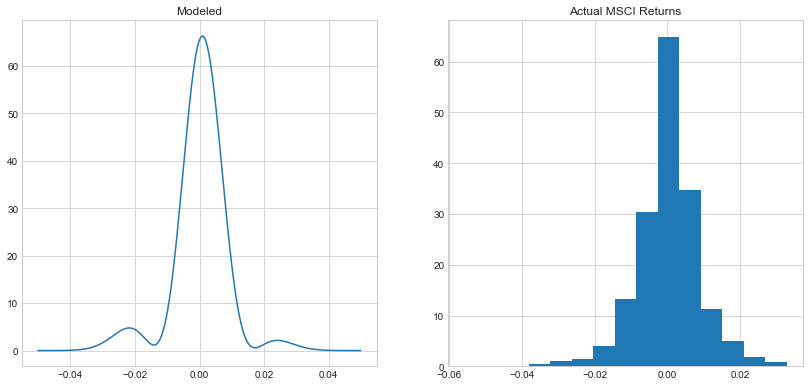

In [78]:
plt.figure(figsize=(14,14))
plt.subplot(2,2,1)
plt.plot(cont_data, temp2)
plt.title('Modeled')

plt.subplot(2,2,2)
plt.hist(returns.MSCI_World.dropna(),bins =15, density =True)
plt.title('Actual MSCI Returns')

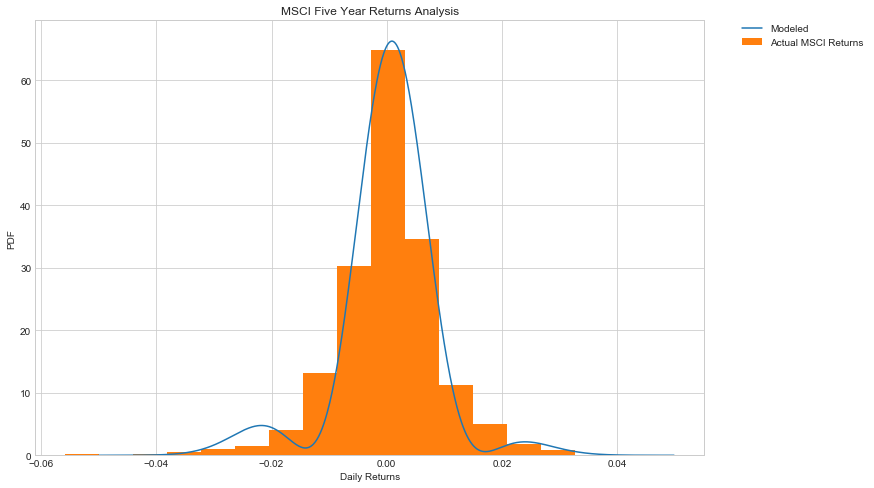

In [79]:
plt.figure(figsize=(12,8))
#plt.subplot(2,2,1)
plt.plot(cont_data, temp2, label = 'Modeled')
#plt.title('Modeled')

#plt.subplot(2,2,2)
plt.hist(returns.MSCI_World.dropna(),bins =15, density =True, label = 'Actual MSCI Returns')
plt.title('MSCI Five Year Returns Analysis')
plt.xlabel('Daily Returns')
plt.ylabel('PDF')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#### PDF FUNCTION FOR ALL TICKS

In [80]:

mvsk_moments = pd.DataFrame()
pdf_function = pd.DataFrame()
pdf_data = pd.DataFrame()
for tick in tickers:
    # Create dataframe of moments for each tick
    mvsk_moments[tick] = [stat_table['Mean'][tick],stat_table['Variance'][tick], \
                stat_table['Skewness'][tick], stat_table['Kurtosis'][tick]]
    # Generate PDF function for each tick
    temp = stat_model.pdf_mvsk(mvsk_moments[tick]) 
    # Dataframe of PDF fucntion at each tick run with data points to create curve
    pdf_function[tick] = temp(cont_data)

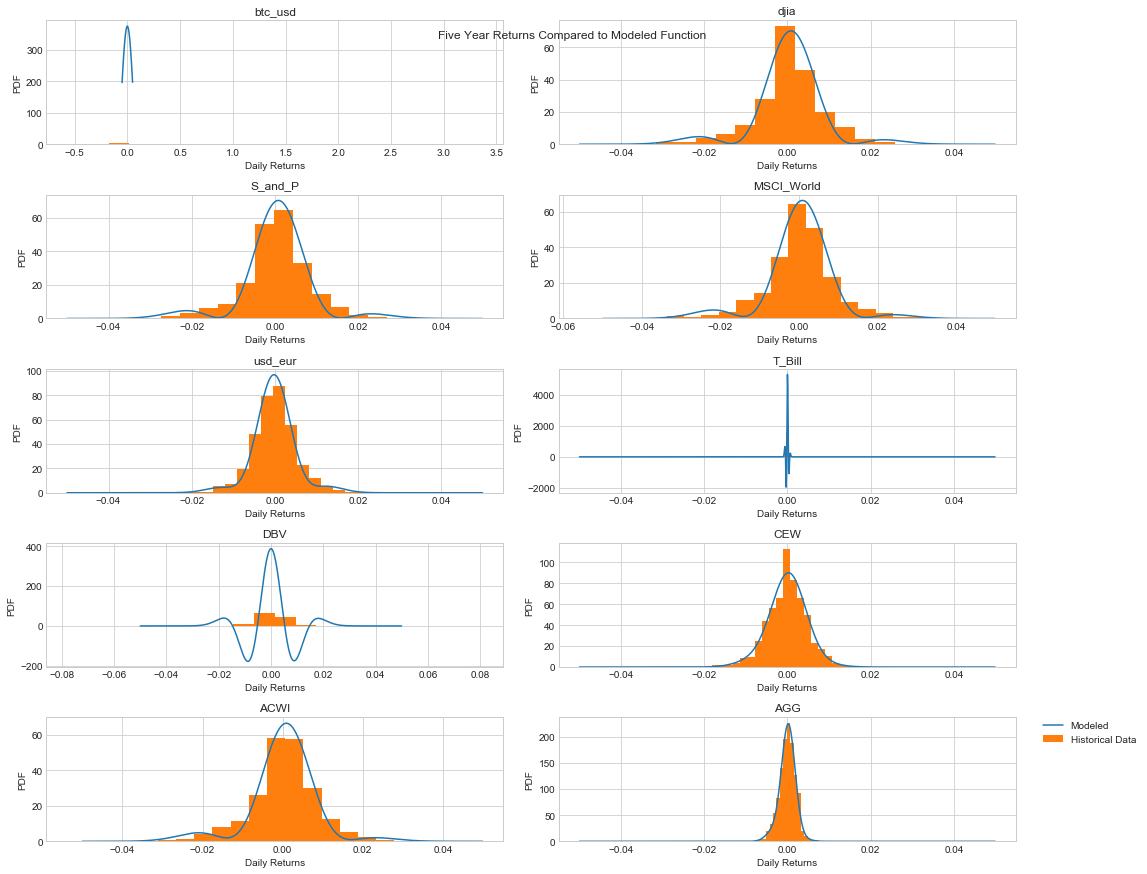

In [81]:
plt.figure(figsize=(16,24))
for count, tick in enumerate(tickers):
    plt.subplot(len(tickers),2,count+1)
    plt.plot(cont_data, pdf_function[tick], label = 'Modeled')
    plt.hist(returns[tick].dropna(),bins =20, density =True, label = 'Historical Data')
    plt.title(tick)
    plt.xlabel('Daily Returns')
    plt.ylabel('PDF')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.suptitle('Five Year Returns Compared to Modeled Function')
plt.tight_layout()

#### CHECK OF PDF FUNCTION

In [82]:
# Check Expected Return = Mean
# Integral of x*f(x)
sum_of_prod = 0
sum_of_x_prod = 0
for tick in tickers:
    for x in range(len(cont_data)):
        # f(x) * dx
        prod = pdf_function[tick][x] *  0.0001
        # x * f(x) * dx
        x_prod = cont_data[x] * prod
         #   Integral of f(x) * dx
        sum_of_prod += prod
         #   Integral of x * f(x) * dx
        sum_of_x_prod += x_prod
    print(tick, ': Integral of PDF = 1 = ',"%.4f" % sum_of_prod,', Modeled mean =',"%.6f" % sum_of_x_prod, \
          ', Calc mean = ', "%.6f" % stat_table['Mean'][tick])
    sum_of_prod = 0
    sum_of_x_prod = 0

btc_usd : Integral of PDF = 1 =  31.1622 , Modeled mean = 0.000728 , Calc mean =  0.002960
djia : Integral of PDF = 1 =  1.0000 , Modeled mean = 0.000386 , Calc mean =  0.000386
S_and_P : Integral of PDF = 1 =  1.0000 , Modeled mean = 0.000358 , Calc mean =  0.000358
MSCI_World : Integral of PDF = 1 =  1.0000 , Modeled mean = 0.000200 , Calc mean =  0.000200
usd_eur : Integral of PDF = 1 =  1.0000 , Modeled mean = -0.000129 , Calc mean =  -0.000129
T_Bill : Integral of PDF = 1 =  1.0000 , Modeled mean = -0.000000 , Calc mean =  -0.000000
DBV : Integral of PDF = 1 =  1.0000 , Modeled mean = -0.000039 , Calc mean =  -0.000039
CEW : Integral of PDF = 1 =  1.0000 , Modeled mean = -0.000024 , Calc mean =  -0.000024
ACWI : Integral of PDF = 1 =  1.0000 , Modeled mean = 0.000191 , Calc mean =  0.000191
AGG : Integral of PDF = 1 =  1.0000 , Modeled mean = -0.000006 , Calc mean =  -0.000006


### Investigate any Curve Fitting Here with Alternate Datapoints

In [83]:
# For BTC expanding range of returns to capture full view of curve
temp_cont_data = np.arange(-2,2, 0.0001)
temp_btc_pdf = stat_model.pdf_mvsk(mvsk_moments['btc_usd']) 
temp_pdf_function = temp_btc_pdf(temp_cont_data)

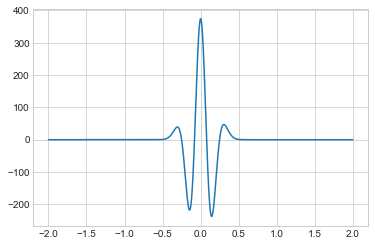

In [84]:
#temp_pdf_function
plt.plot(temp_cont_data, temp_pdf_function, label = 'Modeled')

In [85]:
temp_sum_of_prod = 0
temp_sum_of_x_prod = 0
for x in range(len(temp_cont_data)):
    # f(x) * dx
    prod = temp_pdf_function[x] *  0.0001
    # x * f(x) * dx
    x_prod = temp_cont_data[x] * prod
 #   prod = cont_data[x] * pdf_function['MSCI_World'][x] *  0.0001
    temp_sum_of_prod += prod
    temp_sum_of_x_prod += x_prod
    

In [86]:
print('btc_usd', ': Integral of PDF = 1 = ',"%.4f" % temp_sum_of_prod,', Modeled mean =',"%.6f" % temp_sum_of_x_prod, \
          ', Calc mean = ', "%.6f" % stat_table['Mean']['btc_usd'])

btc_usd : Integral of PDF = 1 =  1.0000 , Modeled mean = 0.002960 , Calc mean =  0.002960


In [87]:
print(temp_sum_of_prod, temp_sum_of_x_prod)

1.0000000000000924 0.0029604436761056646


Text(0,0.5,'PDF')

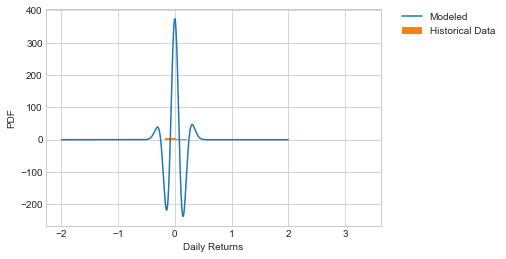

In [88]:
plt.plot(temp_cont_data, temp_pdf_function, label = 'Modeled')
plt.hist(returns['btc_usd'].dropna(),bins =20, density =True, label = 'Historical Data')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Daily Returns')
plt.ylabel('PDF')

#### Annualized Return Analysis

In [89]:
def calc_compound_return(v0,vf,nYears):
    '''
    v0 : Initial value of the investment.
    vf : Final value of the investment.
    nYears : Duration of the investment.
    '''
    growth = float(vf)/v0
    compound_return   = growth**(1./nYears) - 1
    compound_return = compound_return * 100
    return compound_return

def calc_simple_return(v0,vf,nYears):
    '''
    v0 : Initial value of the investment.
    vf : Final value of the investment.
    nYears : Duration of the investment.
    '''
    delta = float(vf) - v0
    simple_return   = delta / v0 /nYears
    simple_return = simple_return *100
    return simple_return

In [90]:
# Get the number of days/years
days = (df.index[0] - df.index[-1]).days
years = days/365

#calculate compound_return
comp_return = [calc_compound_return(df.dropna().loc[:,tick][-1], df.dropna().loc[:,tick][0], years) for tick in tickers]

#calculate simple_return
simp_return = [calc_simple_return(df.dropna().loc[:,tick][-1], df.dropna().loc[:,tick][0], years) for tick in tickers]

#### Value Based, Final - Initial Return, Total Sample

In [91]:
for count, tick in enumerate(tickers):
    print(tick, ' Compounded Return = ', "%.2f" % comp_return[count], \
          '%,  Simple Return = ', "%.2f" % simp_return[count],'%')

btc_usd  Compounded Return =  30.62 %,  Simple Return =  14.72 %
djia  Compounded Return =  7.87 %,  Simple Return =  6.31 %
S_and_P  Compounded Return =  7.07 %,  Simple Return =  5.78 %
MSCI_World  Compounded Return =  3.11 %,  Simple Return =  2.84 %
usd_eur  Compounded Return =  -3.27 %,  Simple Return =  -3.62 %
T_Bill  Compounded Return =  -0.01 %,  Simple Return =  -0.01 %
DBV  Compounded Return =  -1.23 %,  Simple Return =  -1.27 %
CEW  Compounded Return =  -1.32 %,  Simple Return =  -1.38 %
ACWI  Compounded Return =  3.06 %,  Simple Return =  2.80 %
AGG  Compounded Return =  -0.14 %,  Simple Return =  -0.14 %


In [92]:
# Dataframe with no NAs and 1 added to it
returns.ffill(inplace=True)
compound = returns[1:].apply(lambda x: x+1)

In [93]:
compound.head()

,btc_usd,djia,S_and_P,MSCI_World,usd_eur,T_Bill,DBV,CEW,ACWI,AGG
Date,,,,,,,,,,
2014-01-22,0.988298,0.997496,1.000575,1.000855,0.998968,1.000000,1.002745,1.001017,1.001397,0.997856
2014-01-23,0.992860,0.989251,0.991110,0.986469,1.009892,1.000000,0.988268,0.994919,0.991109,1.002615
2014-01-24,0.970757,0.980352,0.979125,0.983396,1.000000,0.999782,0.988920,0.996425,0.976253,1.002143
2014-01-25,1.048552,0.980352,0.979125,0.983396,1.000000,0.999782,0.988920,0.996425,0.976253,1.002143
2014-01-26,1.047812,0.980352,0.979125,0.983396,1.000000,0.999782,0.988920,0.996425,0.976253,1.002143


#### Compound Annual Return From Daily Returns

In [94]:
compound_from_daily = (compound.prod() **(365/len(compound)) - 1) * 100 

In [95]:
compound_from_daily

btc_usd       29.978456
djia           6.428325
S_and_P        6.907387
MSCI_World     1.255630
usd_eur       -9.212017
T_Bill         0.302026
DBV           -6.403393
CEW            0.876474
ACWI           1.137760
AGG            1.409302
dtype: float64

#### Simple Annual Return from Daily Returns

In [96]:
simple_from_daily = returns[1:].sum() * 365 / len(returns[1:]) * 100
simple_from_daily

btc_usd       112.062290
djia            7.563082
S_and_P         8.021352
MSCI_World      2.667304
usd_eur        -9.144334
T_Bill          0.302427
DBV            -5.837771
CEW             1.298278
ACWI            2.511700
AGG             1.470805
dtype: float64

# Three Year

### Set START DATE OF ANALYSIS

In [97]:
#First day of ethereum trading

# 3 years 
start = dt.datetime(2016, 1, 21)
#Enter a specific date or today
end = dt.datetime(2019, 1, 20)
#end = dt.date.today()
print(start)

2016-01-21 00:00:00


Make a dataframe starts at Time specified, date as index, and columns the close price of assets in question

In [98]:
df=pd.DataFrame()

# USING BTC AS BASELINE DATE because it has every day
# NEED TO CHANGE IF BTC IS NOT IN DATASET OR DOING ANYALYSIS PRE-DATING BTC

df['Date'] = btc_usd.Date

df.Date = pd.to_datetime(df.Date, format = '%Y/%m/%d')
df = df[df.Date  >= start ]
df = df.set_index('Date')

for count, name in enumerate(df_names):
    df = df.join(name.set_index('Date').Close.rename(tickers[count]))

In [99]:
df.head(10)

,btc_usd,djia,S_and_P,MSCI_World,usd_eur,T_Bill,DBV,CEW,ACWI,AGG
Date,,,,,,,,,,
2016-01-21,410.239990,15882.679688,1868.989990,62.700001,1.0833,91.379997,22.820000,16.190001,50.540001,108.760002
2016-01-22,382.649994,16093.509766,1906.900024,64.190002,1.0814,91.339996,22.969999,16.330000,51.820000,108.839996
2016-01-23,388.609985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-24,402.130005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-25,392.760010,15885.219727,1877.079956,63.209999,1.0832,91.360001,22.780001,16.209999,51.049999,108.779999
2016-01-26,389.779999,16167.230469,1903.630005,64.339996,1.0846,91.339996,22.969999,16.370001,51.900002,108.919998
2016-01-27,395.019989,15944.459961,1882.949951,63.799999,1.0867,91.360001,22.889999,16.330000,51.470001,108.940002
2016-01-28,379.690002,16069.639648,1893.359985,64.070000,1.0952,91.360001,23.010000,16.469999,51.750000,109.029999
2016-01-29,380.290009,16466.300781,1940.239990,65.349998,1.0832,91.379997,23.120001,16.510000,52.860001,109.349998


### Daily Percent Change
#### daily_df is a dataframe of daily returns

In [100]:
daily_df=pd.DataFrame(df, copy =True)

for count, name in enumerate(tickers):
    daily_df[name] = df[name].dropna().pct_change(fill_method='ffill')

daily_df.head(10)

,btc_usd,djia,S_and_P,MSCI_World,usd_eur,T_Bill,DBV,CEW,ACWI,AGG
Date,,,,,,,,,,
2016-01-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-22,-0.067253,0.013274,0.020284,0.023764,-0.001754,-0.000438,0.006573,0.008647,0.025326,0.000736
2016-01-23,0.015576,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-24,0.034791,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-25,-0.023301,-0.012942,-0.015638,-0.015267,0.001665,0.000219,-0.008272,-0.007348,-0.014859,-0.000551
2016-01-26,-0.007587,0.017753,0.014144,0.017877,0.001292,-0.000219,0.008341,0.009871,0.016650,0.001287
2016-01-27,0.013443,-0.013779,-0.010863,-0.008393,0.001936,0.000219,-0.003483,-0.002444,-0.008285,0.000184
2016-01-28,-0.038808,0.007851,0.005529,0.004232,0.007822,0.000000,0.005243,0.008573,0.005440,0.000826
2016-01-29,0.001580,0.024684,0.024760,0.019978,-0.010957,0.000219,0.004781,0.002429,0.021449,0.002935


In [101]:
returns=daily_df

In [102]:
returns.head(10)

,btc_usd,djia,S_and_P,MSCI_World,usd_eur,T_Bill,DBV,CEW,ACWI,AGG
Date,,,,,,,,,,
2016-01-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-22,-0.067253,0.013274,0.020284,0.023764,-0.001754,-0.000438,0.006573,0.008647,0.025326,0.000736
2016-01-23,0.015576,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-24,0.034791,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-25,-0.023301,-0.012942,-0.015638,-0.015267,0.001665,0.000219,-0.008272,-0.007348,-0.014859,-0.000551
2016-01-26,-0.007587,0.017753,0.014144,0.017877,0.001292,-0.000219,0.008341,0.009871,0.016650,0.001287
2016-01-27,0.013443,-0.013779,-0.010863,-0.008393,0.001936,0.000219,-0.003483,-0.002444,-0.008285,0.000184
2016-01-28,-0.038808,0.007851,0.005529,0.004232,0.007822,0.000000,0.005243,0.008573,0.005440,0.000826
2016-01-29,0.001580,0.024684,0.024760,0.019978,-0.010957,0.000219,0.004781,0.002429,0.021449,0.002935


### Bollinger Band Comparison

In [103]:
for count, name in enumerate(tickers):
    print(count, name)

0 btc_usd
1 djia
2 S_and_P
3 MSCI_World
4 usd_eur
5 T_Bill
6 DBV
7 CEW
8 ACWI
9 AGG


In [104]:
rolling_std=pd.DataFrame(df, copy =True)
rolling_mean=pd.DataFrame(df, copy =True)

for count, name in enumerate(tickers):
    rolling_std[name] = (df[name].dropna().rolling(window = 21).std()).T.squeeze()
    rolling_mean[name] = (df[name].dropna().rolling(window = 21).mean()).T.squeeze()

rolling_mean.iloc[85:90]

,btc_usd,djia,S_and_P,MSCI_World,usd_eur,T_Bill,DBV,CEW,ACWI,AGG
Date,,,,,,,,,,
2016-04-12,419.752858,17568.139230,2046.986665,68.871904,1.129010,91.378094,23.267143,17.540476,55.643334,110.344762
2016-04-13,420.110477,17600.479632,2049.976185,68.972380,1.129814,91.379999,23.277619,17.566667,55.722857,110.409047
2016-04-14,420.305715,17632.617746,2053.159517,69.082857,1.130705,91.381904,23.300000,17.600476,55.823334,110.469048
2016-04-15,420.679048,17659.841611,2055.707613,69.159523,1.130605,91.381904,23.319524,17.619048,55.894762,110.521428
2016-04-16,420.759524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [105]:
upper_band = rolling_mean + (rolling_std* 2)
lower_band = rolling_mean - (rolling_std* 2)
middle_band= rolling_mean

### TIME SERIES VISUALIZATION

In [106]:
# for name in df_names:
#     name.Date = pd.to_datetime(name.Date, format = '%Y/%m/%d')
#     name = name.reset_index(drop = True)

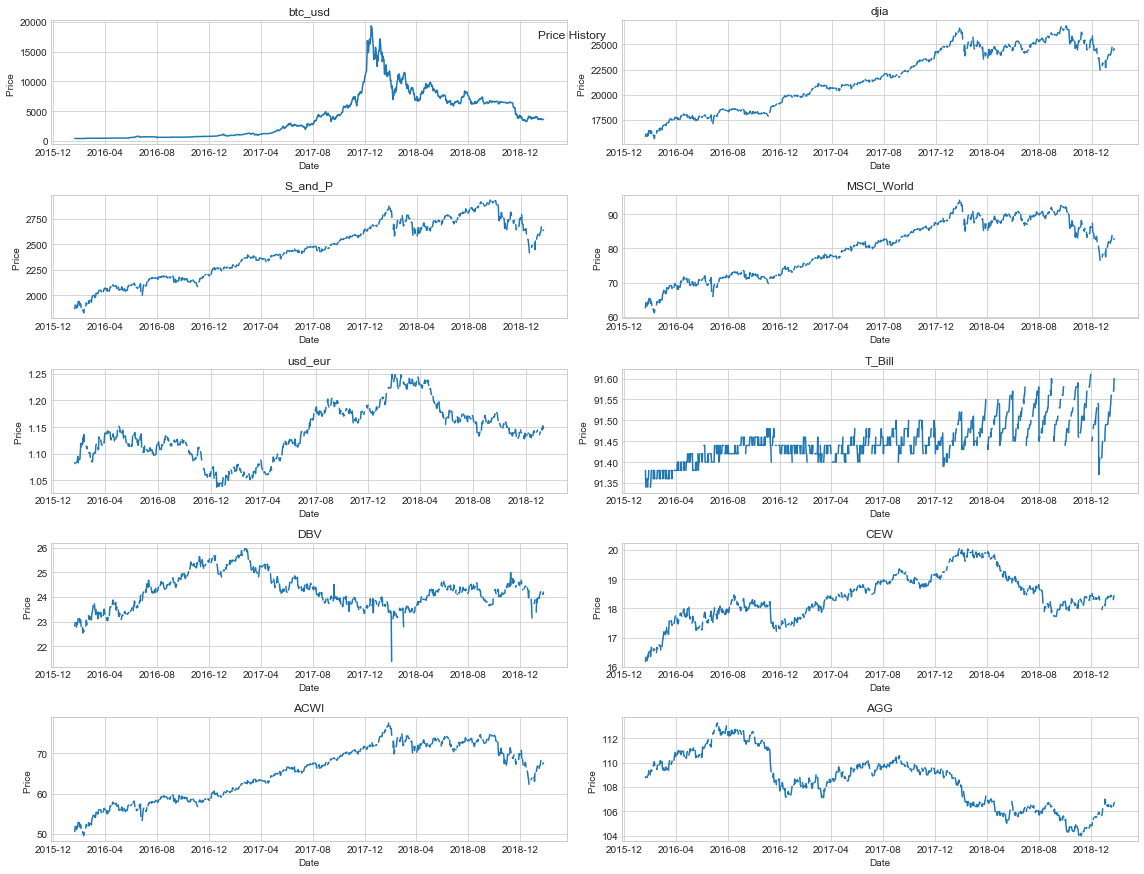

In [107]:
plt.figure(figsize=(16,24))
for count, name in enumerate(tickers):
    plt.subplot(len(tickers),2,count+1)
    plt.plot(df.index, df[name]) #,legend=True,logy=True )
    plt.title(tickers[count])
    plt.xlabel('Date')
    plt.ylabel('Price ')
plt.suptitle('Price History')
plt.tight_layout()

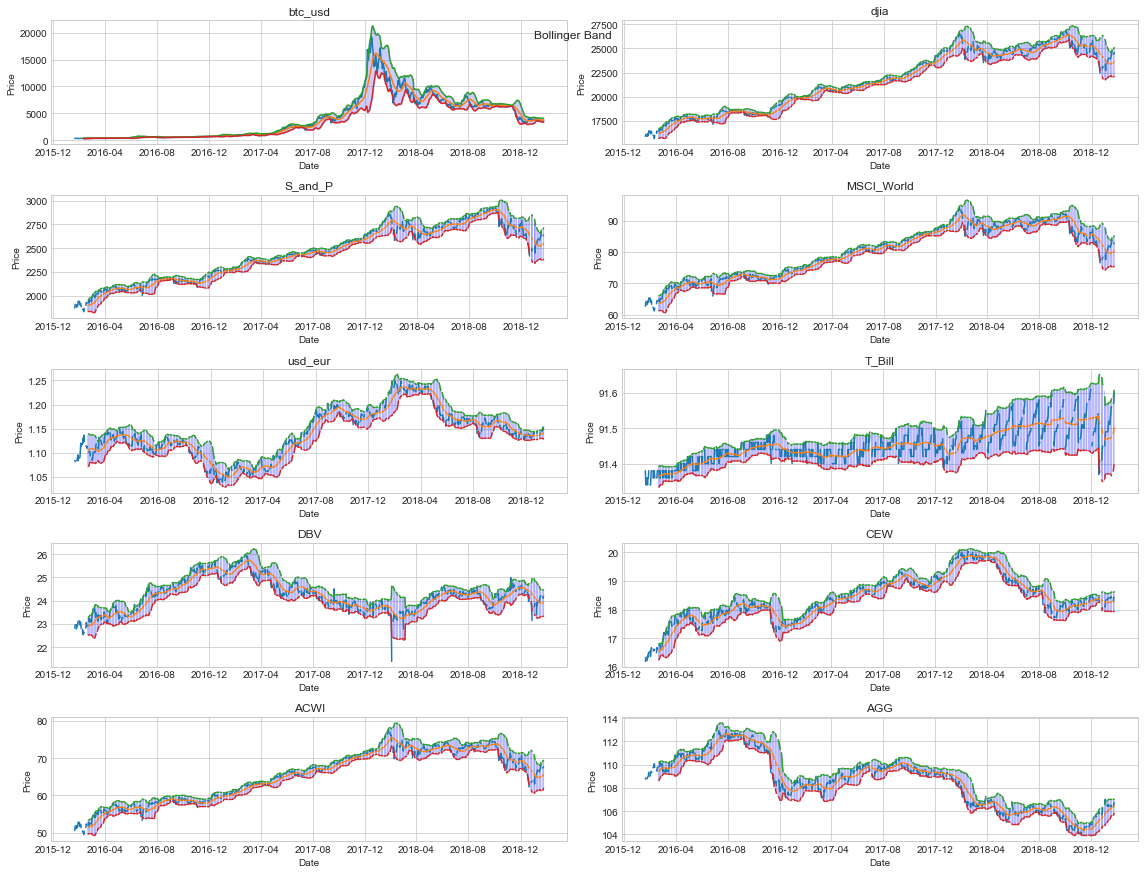

In [108]:
plt.figure(figsize=(16,24))
for count, name in enumerate(df_names):
    plt.subplot(len(tickers),2,count+1)
    plt.plot(df.index, df[tickers[count]])
    plt.plot(middle_band.index, middle_band[tickers[count]]) # name.Close)
    plt.plot(upper_band.index, upper_band[tickers[count]]) # name.Close)
    plt.plot(lower_band.index, lower_band[tickers[count]]) # name.Close)
    plt.fill_between(rolling_std.index, lower_band[tickers[count]], upper_band[tickers[count]], color='b', alpha=0.2)
    plt.title(tickers[count])
    plt.xlabel('Date')
    plt.ylabel('Price')
plt.suptitle('Bollinger Band')
plt.tight_layout()

### Correlation

In [109]:
corr_df=returns.corr()
corr_df

,btc_usd,djia,S_and_P,MSCI_World,usd_eur,T_Bill,DBV,CEW,ACWI,AGG
btc_usd,1.000000,0.057984,0.054850,0.050947,0.019420,0.045053,-0.089680,0.041496,0.058294,0.019469
djia,0.057984,1.000000,0.963802,0.901655,0.026451,-0.010469,0.121922,0.367399,0.908320,-0.195411
S_and_P,0.054850,0.963802,1.000000,0.939157,0.017629,-0.010893,0.131166,0.388522,0.947366,-0.170394
MSCI_World,0.050947,0.901655,0.939157,1.000000,0.125602,0.006837,0.136803,0.462213,0.977364,-0.151345
usd_eur,0.019420,0.026451,0.017629,0.125602,1.000000,-0.000370,-0.173611,0.412387,0.133896,0.122260
T_Bill,0.045053,-0.010469,-0.010893,0.006837,-0.000370,1.000000,-0.043800,-0.005791,0.004441,0.176830
DBV,-0.089680,0.121922,0.131166,0.136803,-0.173611,-0.043800,1.000000,0.158584,0.138268,0.043593
CEW,0.041496,0.367399,0.388522,0.462213,0.412387,-0.005791,0.158584,1.000000,0.509493,0.112789
ACWI,0.058294,0.908320,0.947366,0.977364,0.133896,0.004441,0.138268,0.509493,1.000000,-0.138392
AGG,0.019469,-0.195411,-0.170394,-0.151345,0.122260,0.176830,0.043593,0.112789,-0.138392,1.000000


### Statistics Table

In [110]:
# returns = returns[0:1246]
# returns.tail()

In [111]:
stat_table=pd.DataFrame(index=tickers)
# stat_table.set_index(tickers)
stat_table['Mean']=stats.describe(returns.dropna())[2]
stat_table['Min']=stats.describe(returns.dropna())[1][0]
stat_table['Max']=stats.describe(returns.dropna())[1][1]
stat_table['Variance']=stats.describe(returns.dropna())[3]
stat_table['Std']=returns.dropna().std()
stat_table['Skewness']=stats.describe(returns.dropna())[4]
stat_table['Kurtosis']=stats.describe(returns.dropna())[5]
stat_table['z-value']=stats.kurtosistest(returns.dropna())[0]
stat_table['p-value']=stats.kurtosistest(returns.dropna())[1]
stat_table

,Mean,Min,Max,Variance,Std,Skewness,Kurtosis,z-value,p-value
btc_usd,0.002661,-0.172351,0.255605,1.872875e-03,0.043277,0.193946,4.401508,8.973211,2.879942e-19
djia,0.000647,-0.046049,0.049846,6.737424e-05,0.008208,-0.472516,5.681977,9.904195,3.991723e-23
S_and_P,0.000536,-0.040979,0.049594,6.547642e-05,0.008092,-0.410014,5.483922,9.775583,1.433296e-22
MSCI_World,0.000448,-0.055835,0.032783,6.616775e-05,0.008134,-0.778374,5.480708,9.773456,1.463726e-22
usd_eur,0.000088,-0.026370,0.021761,2.332778e-05,0.004830,-0.079718,2.157552,6.405069,1.503010e-10
T_Bill,0.000002,-0.001857,0.000438,6.493901e-08,0.000255,-2.892056,14.918193,13.187936,1.029654e-39
DBV,0.000094,-0.078017,0.080879,4.527659e-05,0.006729,0.159108,52.258499,16.534251,2.079476e-61
CEW,0.000223,-0.018102,0.015873,2.377109e-05,0.004876,-0.225202,0.750793,3.273126,1.063652e-03
ACWI,0.000458,-0.053842,0.036940,6.698843e-05,0.008185,-0.648405,4.870228,9.343381,9.330558e-21
AGG,-0.000022,-0.009285,0.006596,3.480985e-06,0.001866,-0.257441,0.980961,3.950446,7.800560e-05


In [112]:
stat_table['Mean']['MSCI_World']

0.00044788470926921645

In [113]:
returns.dropna().describe()

,btc_usd,djia,S_and_P,MSCI_World,usd_eur,T_Bill,DBV,CEW,ACWI,AGG
count,741.000000,741.000000,741.000000,741.000000,741.000000,741.000000,741.000000,741.000000,741.000000,741.000000
mean,0.002661,0.000647,0.000536,0.000448,0.000088,0.000002,0.000094,0.000223,0.000458,-0.000022
std,0.043277,0.008208,0.008092,0.008134,0.004830,0.000255,0.006729,0.004876,0.008185,0.001866
min,-0.172351,-0.046049,-0.040979,-0.055835,-0.026370,-0.001857,-0.078017,-0.018102,-0.053842,-0.009285
25%,-0.010934,-0.002495,-0.002254,-0.002802,-0.002808,0.000000,-0.002991,-0.002764,-0.002814,-0.001134
50%,0.003219,0.000747,0.000489,0.000659,-0.000179,0.000000,0.000395,0.000523,0.000690,0.000092
75%,0.019376,0.004362,0.004270,0.004429,0.003009,0.000218,0.003147,0.003335,0.004637,0.001140
max,0.255605,0.049846,0.049594,0.032783,0.021761,0.000438,0.080879,0.015873,0.036940,0.006596


### Covariance

In [114]:
cov_df=returns[1:].dropna().cov()
cov_df

,btc_usd,djia,S_and_P,MSCI_World,usd_eur,T_Bill,DBV,CEW,ACWI,AGG
btc_usd,1.872875e-03,2.180408e-05,2.058215e-05,1.883088e-05,4.032270e-06,5.288284e-07,-2.647965e-05,9.037421e-06,2.154757e-05,1.242832e-06
djia,2.180408e-05,6.737424e-05,6.398522e-05,6.013777e-05,1.048651e-06,-2.435312e-08,6.900504e-06,1.425767e-05,6.100210e-05,-2.985871e-06
S_and_P,2.058215e-05,6.398522e-05,6.547642e-05,6.175422e-05,6.889997e-07,-2.759236e-08,7.184613e-06,1.495116e-05,6.271943e-05,-2.552821e-06
MSCI_World,1.883088e-05,6.013777e-05,6.175422e-05,6.616775e-05,4.934639e-06,8.181149e-09,7.574063e-06,1.811918e-05,6.505243e-05,-2.267436e-06
usd_eur,4.032270e-06,1.048651e-06,6.889997e-07,4.934639e-06,2.332778e-05,-4.557933e-10,-5.642235e-06,9.711054e-06,5.293016e-06,1.101722e-06
T_Bill,5.288284e-07,-2.435312e-08,-2.759236e-08,8.181149e-09,-4.557933e-10,6.493901e-08,-7.978025e-08,-8.607241e-09,8.509530e-10,8.417082e-08
DBV,-2.647965e-05,6.900504e-06,7.184613e-06,7.574063e-06,-5.642235e-06,-7.978025e-08,4.527659e-05,5.130593e-06,7.646038e-06,5.069627e-07
CEW,9.037421e-06,1.425767e-05,1.495116e-05,1.811918e-05,9.711054e-06,-8.607241e-09,5.130593e-06,2.377109e-05,2.016538e-05,1.040391e-06
ACWI,2.154757e-05,6.100210e-05,6.271943e-05,6.505243e-05,5.293016e-06,8.509530e-10,7.646038e-06,2.016538e-05,6.698843e-05,-2.106513e-06
AGG,1.242832e-06,-2.985871e-06,-2.552821e-06,-2.267436e-06,1.101722e-06,8.417082e-08,5.069627e-07,1.040391e-06,-2.106513e-06,3.480985e-06


### Exogenous Distribution of Returns

In [115]:
 # MSCI Test
MSCI_moments = [stat_table['Mean']['MSCI_World'],stat_table['Variance']['MSCI_World'], \
                stat_table['Skewness']['MSCI_World'], stat_table['Kurtosis']['MSCI_World']]

In [116]:
MSCI_function = stat_model.pdf_mvsk(MSCI_moments)

In [117]:
MSCI_function(0)

81.26686104901968

In [118]:
# Create Dataset of 'continuous-like' data , many closely spaced, datapoints, to query generated PDF Function
cont_data = np.arange(-0.05,0.05, 0.0001)
len(cont_data)

1000

In [119]:
# Generate the array containing the output of PDF(x)
temp2 = MSCI_function(cont_data)

In [120]:
# plt.plot(cont_data, temp2)

In [121]:
# plt.hist(returns.MSCI_World.dropna(),bins =15, )

Text(0.5,1,'Actual MSCI Returns')

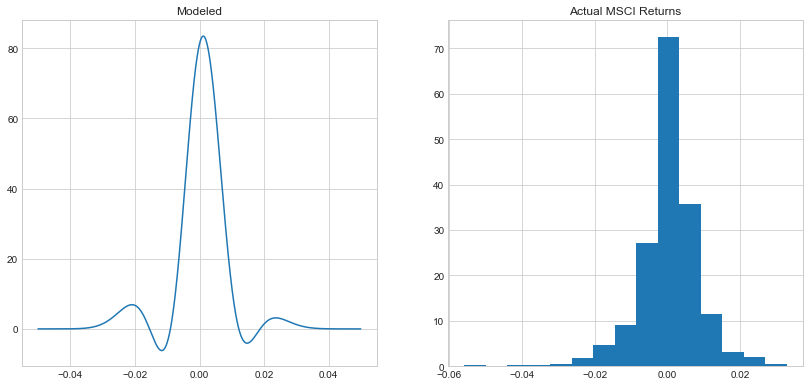

In [122]:
plt.figure(figsize=(14,14))
plt.subplot(2,2,1)
plt.plot(cont_data, temp2)
plt.title('Modeled')

plt.subplot(2,2,2)
plt.hist(returns.MSCI_World.dropna(),bins =15, density =True)
plt.title('Actual MSCI Returns')

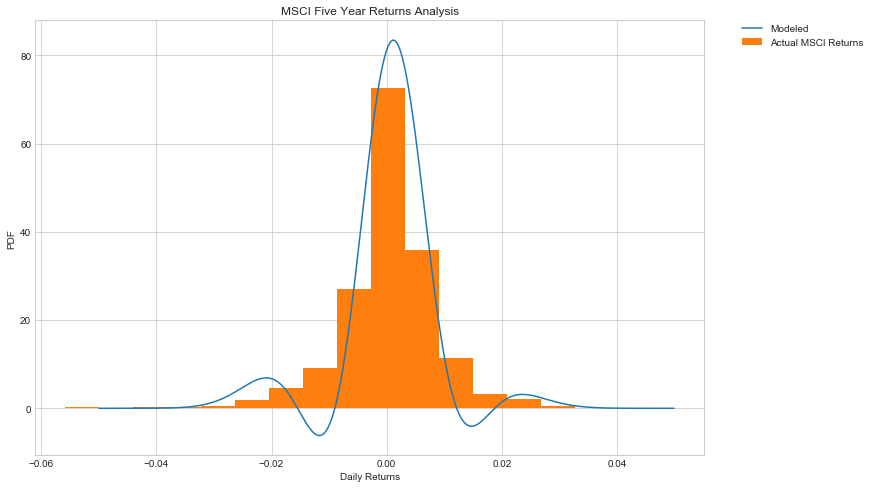

In [123]:
plt.figure(figsize=(12,8))
#plt.subplot(2,2,1)
plt.plot(cont_data, temp2, label = 'Modeled')
#plt.title('Modeled')

#plt.subplot(2,2,2)
plt.hist(returns.MSCI_World.dropna(),bins =15, density =True, label = 'Actual MSCI Returns')
plt.title('MSCI Five Year Returns Analysis')
plt.xlabel('Daily Returns')
plt.ylabel('PDF')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#### PDF FUNCTION FOR ALL TICKS

In [124]:

mvsk_moments = pd.DataFrame()
pdf_function = pd.DataFrame()
pdf_data = pd.DataFrame()
for tick in tickers:
    # Create dataframe of moments for each tick
    mvsk_moments[tick] = [stat_table['Mean'][tick],stat_table['Variance'][tick], \
                stat_table['Skewness'][tick], stat_table['Kurtosis'][tick]]
    # Generate PDF function for each tick
    temp = stat_model.pdf_mvsk(mvsk_moments[tick]) 
    # Dataframe of PDF fucntion at each tick run with data points to create curve
    pdf_function[tick] = temp(cont_data)

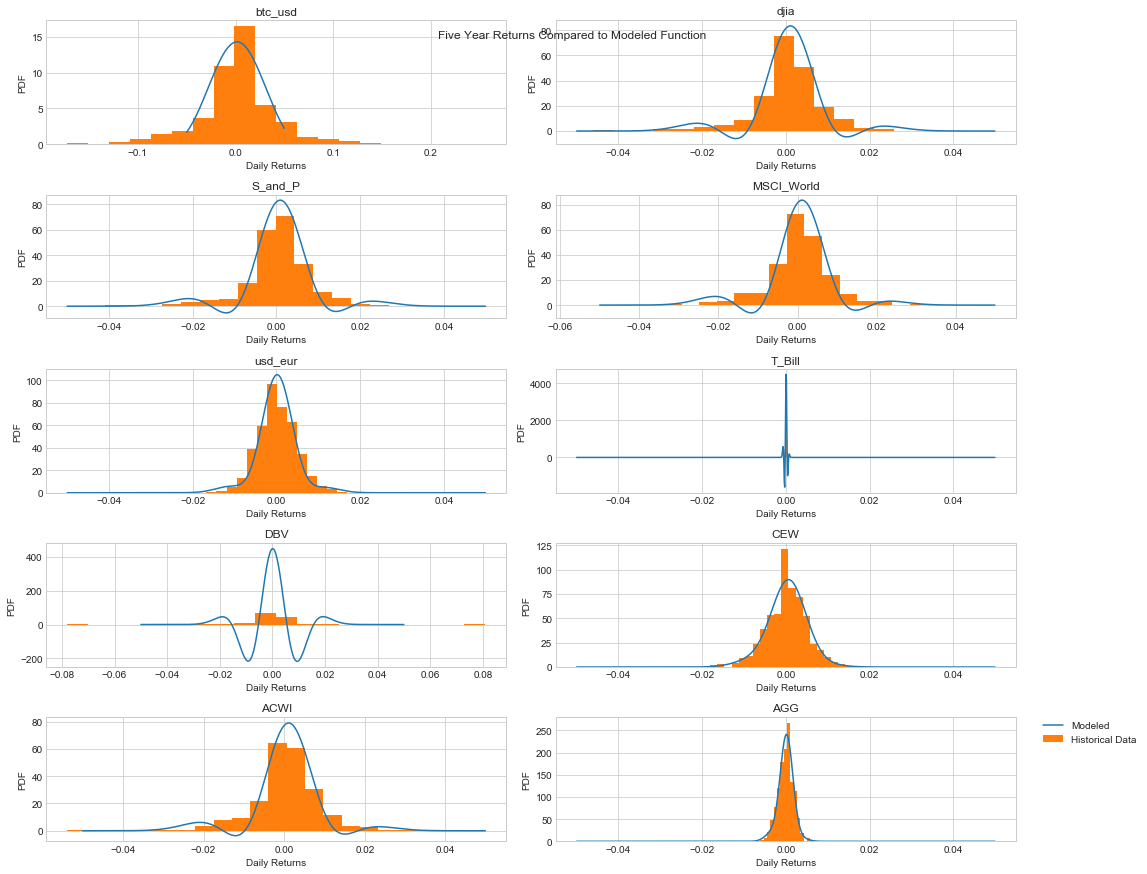

In [125]:
plt.figure(figsize=(16,24))
for count, tick in enumerate(tickers):
    plt.subplot(len(tickers),2,count+1)
    plt.plot(cont_data, pdf_function[tick], label = 'Modeled')
    plt.hist(returns[tick].dropna(),bins =20, density =True, label = 'Historical Data')
    plt.title(tick)
    plt.xlabel('Daily Returns')
    plt.ylabel('PDF')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.suptitle('Five Year Returns Compared to Modeled Function')
plt.tight_layout()

#### CHECK OF PDF FUNCTION

In [126]:
# Check Expected Return = Mean
# Integral of x*f(x)
sum_of_prod = 0
sum_of_x_prod = 0
for tick in tickers:
    for x in range(len(cont_data)):
        # f(x) * dx
        prod = pdf_function[tick][x] *  0.0001
        # x * f(x) * dx
        x_prod = cont_data[x] * prod
         #   Integral of f(x) * dx
        sum_of_prod += prod
         #   Integral of x * f(x) * dx
        sum_of_x_prod += x_prod
    print(tick, ': Integral of PDF = 1 = ',"%.4f" % sum_of_prod,', Modeled mean =',"%.6f" % sum_of_x_prod, \
          ', Calc mean = ', "%.6f" % stat_table['Mean'][tick])
    sum_of_prod = 0
    sum_of_x_prod = 0

btc_usd : Integral of PDF = 1 =  0.8966 , Modeled mean = 0.000981 , Calc mean =  0.002661
djia : Integral of PDF = 1 =  1.0000 , Modeled mean = 0.000647 , Calc mean =  0.000647
S_and_P : Integral of PDF = 1 =  1.0000 , Modeled mean = 0.000536 , Calc mean =  0.000536
MSCI_World : Integral of PDF = 1 =  1.0000 , Modeled mean = 0.000448 , Calc mean =  0.000448
usd_eur : Integral of PDF = 1 =  1.0000 , Modeled mean = 0.000088 , Calc mean =  0.000088
T_Bill : Integral of PDF = 1 =  1.0000 , Modeled mean = 0.000002 , Calc mean =  0.000002
DBV : Integral of PDF = 1 =  1.0000 , Modeled mean = 0.000094 , Calc mean =  0.000094
CEW : Integral of PDF = 1 =  1.0000 , Modeled mean = 0.000223 , Calc mean =  0.000223
ACWI : Integral of PDF = 1 =  1.0000 , Modeled mean = 0.000458 , Calc mean =  0.000458
AGG : Integral of PDF = 1 =  1.0000 , Modeled mean = -0.000022 , Calc mean =  -0.000022


### Investigate any Curve Fitting Here with Alternate Datapoints

In [127]:
# For BTC expanding range of returns to capture full view of curve
temp_cont_data = np.arange(-2,2, 0.0001)
temp_btc_pdf = stat_model.pdf_mvsk(mvsk_moments['btc_usd']) 
temp_pdf_function = temp_btc_pdf(temp_cont_data)

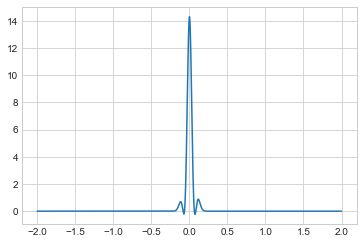

In [128]:
#temp_pdf_function
plt.plot(temp_cont_data, temp_pdf_function, label = 'Modeled')

In [129]:
temp_sum_of_prod = 0
temp_sum_of_x_prod = 0
for x in range(len(temp_cont_data)):
    # f(x) * dx
    prod = temp_pdf_function[x] *  0.0001
    # x * f(x) * dx
    x_prod = temp_cont_data[x] * prod
 #   prod = cont_data[x] * pdf_function['MSCI_World'][x] *  0.0001
    temp_sum_of_prod += prod
    temp_sum_of_x_prod += x_prod
    

In [130]:
print('btc_usd', ': Integral of PDF = 1 = ',"%.4f" % temp_sum_of_prod,', Modeled mean =',"%.6f" % temp_sum_of_x_prod, \
          ', Calc mean = ', "%.6f" % stat_table['Mean']['btc_usd'])

btc_usd : Integral of PDF = 1 =  1.0000 , Modeled mean = 0.002661 , Calc mean =  0.002661


In [131]:
print(temp_sum_of_prod, temp_sum_of_x_prod)

1.0000000000001026 0.002661398392524451


Text(0,0.5,'PDF')

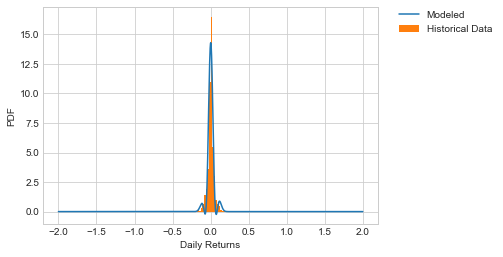

In [132]:
plt.plot(temp_cont_data, temp_pdf_function, label = 'Modeled')
plt.hist(returns['btc_usd'].dropna(),bins =20, density =True, label = 'Historical Data')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Daily Returns')
plt.ylabel('PDF')

#### Annualized Return Analysis

In [133]:
def calc_compound_return(v0,vf,nYears):
    '''
    v0 : Initial value of the investment.
    vf : Final value of the investment.
    nYears : Duration of the investment.
    '''
    growth = float(vf)/v0
    compound_return   = growth**(1./nYears) - 1
    compound_return = compound_return * 100
    return compound_return

def calc_simple_return(v0,vf,nYears):
    '''
    v0 : Initial value of the investment.
    vf : Final value of the investment.
    nYears : Duration of the investment.
    '''
    delta = float(vf) - v0
    simple_return   = delta / v0 /nYears
    simple_return = simple_return *100
    return simple_return

In [134]:
# Get the number of days/years
days = (df.index[0] - df.index[-1]).days
years = days/365

#calculate compound_return
comp_return = [calc_compound_return(df.dropna().loc[:,tick][-1], df.dropna().loc[:,tick][0], years) for tick in tickers]

#calculate simple_return
simp_return = [calc_simple_return(df.dropna().loc[:,tick][-1], df.dropna().loc[:,tick][0], years) for tick in tickers]

#### Value Based, Final - Initial Return, Total Sample

In [135]:
for count, tick in enumerate(tickers):
    print(tick, ' Compounded Return = ', "%.2f" % comp_return[count], \
          '%,  Simple Return = ', "%.2f" % simp_return[count],'%')

btc_usd  Compounded Return =  107.03 %,  Simple Return =  29.50 %
djia  Compounded Return =  14.69 %,  Simple Return =  11.23 %
S_and_P  Compounded Return =  11.53 %,  Simple Return =  9.30 %
MSCI_World  Compounded Return =  9.22 %,  Simple Return =  7.75 %
usd_eur  Compounded Return =  1.94 %,  Simple Return =  1.87 %
T_Bill  Compounded Return =  0.05 %,  Simple Return =  0.05 %
DBV  Compounded Return =  1.65 %,  Simple Return =  1.59 %
CEW  Compounded Return =  4.32 %,  Simple Return =  3.97 %
ACWI  Compounded Return =  9.61 %,  Simple Return =  8.02 %
AGG  Compounded Return =  -0.68 %,  Simple Return =  -0.69 %


In [136]:
# Dataframe with no NAs and 1 added to it
returns.ffill(inplace=True)
compound = returns[1:].apply(lambda x: x+1)

In [137]:
compound.head()

,btc_usd,djia,S_and_P,MSCI_World,usd_eur,T_Bill,DBV,CEW,ACWI,AGG
Date,,,,,,,,,,
2016-01-22,0.932747,1.013274,1.020284,1.023764,0.998246,0.999562,1.006573,1.008647,1.025326,1.000736
2016-01-23,1.015576,1.013274,1.020284,1.023764,0.998246,0.999562,1.006573,1.008647,1.025326,1.000736
2016-01-24,1.034791,1.013274,1.020284,1.023764,0.998246,0.999562,1.006573,1.008647,1.025326,1.000736
2016-01-25,0.976699,0.987058,0.984362,0.984733,1.001665,1.000219,0.991728,0.992652,0.985141,0.999449
2016-01-26,0.992413,1.017753,1.014144,1.017877,1.001292,0.999781,1.008341,1.009871,1.016650,1.001287


#### Compound Annual Return From Daily Returns

In [138]:
compound_from_daily = (compound.prod() **(365/len(compound)) - 1) * 100 

In [139]:
compound_from_daily

btc_usd       105.023955
djia           21.102900
S_and_P        17.789767
MSCI_World     13.965872
usd_eur        -2.979026
T_Bill          0.488647
DBV            -5.273697
CEW            13.050950
ACWI           14.991216
AGG            -0.147495
dtype: float64

#### Simple Annual Return from Daily Returns

In [140]:
simple_from_daily = returns[1:].sum() * 365 / len(returns[1:]) * 100
simple_from_daily

btc_usd       102.326780
djia           20.433116
S_and_P        17.673051
MSCI_World     14.380120
usd_eur        -2.586466
T_Bill          0.488564
DBV            -4.479363
CEW            12.698341
ACWI           15.284208
AGG            -0.084478
dtype: float64